In [1]:
# importing the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
# reading in the data file
corona = pd.read_csv("./Data/covid19-in-india/covid_19_india.csv", parse_dates = [1], dayfirst = True)

# making a column to track the active cases
corona['Active'] = corona["ConfirmedIndianNational"] + corona["ConfirmedForeignNational"] - (corona['Cured'] + corona['Deaths'])

# dropping the columns which don't add to the analysis
corona = corona.drop(["Sno", "Time", "ConfirmedIndianNational", "ConfirmedForeignNational"], axis = 1)

# a dataframe with the latest number of cases
end_date = []
for ind, i in corona.iterrows():
    if i["Date"] == corona["Date"][len(corona) - 1]:
        end_date.append(ind)
max_cases = corona[min(end_date): max(end_date) + 1]

# manipulating the indian cases DataFrame
max_cases = max_cases.drop(["Date"], axis = 1)
print("Cases cured in each state (%)\n")
for ind, i in max_cases.iterrows():
    if (i["Cured"] / i["Active"]) != 0:
        print(i["State/UnionTerritory"], "cured", 100 * i["Cured"] / i["Active"], "%")

# converting "Date" into Datetime format
corona["Date"] = pd.to_datetime(corona["Date"])

Cases cured in each state (%)

Andhra Pradesh cured 7.6923076923076925 %
Delhi cured 19.35483870967742 %
Haryana cured 57.142857142857146 %
Jammu and Kashmir cured 3.4482758620689653 %
Karnataka cured 7.352941176470588 %
Kerala cured 9.036144578313253 %
Ladakh cured 30.0 %
Maharashtra cured 16.129032258064516 %
Punjab cured 2.7777777777777777 %
Rajasthan cured 5.882352941176471 %
Tamil Nadu cured 5.128205128205129 %
Telengana cured 1.5625 %
Uttarakhand cured 20.0 %
Uttar Pradesh cured 25.0 %


In [3]:
# grouping the cases by date and state/union territory for easier analysis
state_date = corona.groupby(["Date", "State/UnionTerritory"]).agg({"Active": "sum"})

# making the "Date" column part of the database
state_date["Date"] = state_date.index

# making the index column
ind = []
for i in range(len(state_date)):
    ind.append(i)
state_date["Index"] = ind
state_date.set_index("Index", inplace = True)

# making and attaching the date and state/union territory column to the database
date = []
for i in state_date["Date"]:
    date.append(i[0])
state = []
for i in state_date["Date"]:
    state.append(i[1])
state_date["Date"] = date
state_date["State/UnionTerritory"] = state
        
# resetting DataFrame with columns in desired order
state_date = state_date[["Date", "State/UnionTerritory", "Active"]]

In [4]:
# adding a new column to the database which counts the days since the first case was reported
state_date["Days Since"] = state_date["Date"] - state_date["Date"][0]
state_date["Days Since"] = state_date["Days Since"].dt.days

# removing the rows with entries that are not integers
to_remove = []
for idx, i in state_date.iterrows():
    try:
        k = int(i["Active"])
    except:
        to_remove.append(idx)
state_date = state_date.drop(to_remove)

# correcting the name of the state and the union territory
for ind, i in state_date.iterrows():
    if i["State/UnionTerritory"] == "Chattisgarh":
        state_date.iat[ind, 1] = "Chhattisgarh"
    elif i["State/UnionTerritory"] == "Pondicherry":
        state_date.iat[ind, 1] = "Puducherry"

# printing the DataFrame with the new "Days Since" columns added
print(state_date)

            Date         State/UnionTerritory  Active  Days Since
Index                                                            
0     2020-01-30                       Kerala       1           0
1     2020-01-31                       Kerala       1           1
2     2020-02-01                       Kerala       2           2
3     2020-02-02                       Kerala       3           3
4     2020-02-03                       Kerala       3           4
5     2020-02-04                       Kerala       3           5
6     2020-02-05                       Kerala       3           6
7     2020-02-06                       Kerala       3           7
8     2020-02-07                       Kerala       3           8
9     2020-02-08                       Kerala       3           9
10    2020-02-09                       Kerala       3          10
11    2020-02-10                       Kerala       3          11
12    2020-02-11                       Kerala       3          12
13    2020

# Statewise analysis

In [5]:
# finding the unique states in the column to analyze further
states = state_date["State/UnionTerritory"]
# insert the list to the set 
unique_states = set(states) 
# convert the set to the list 
unique_states = (list(unique_states))
# sorting the list alphabetically
unique_states = sorted(unique_states)

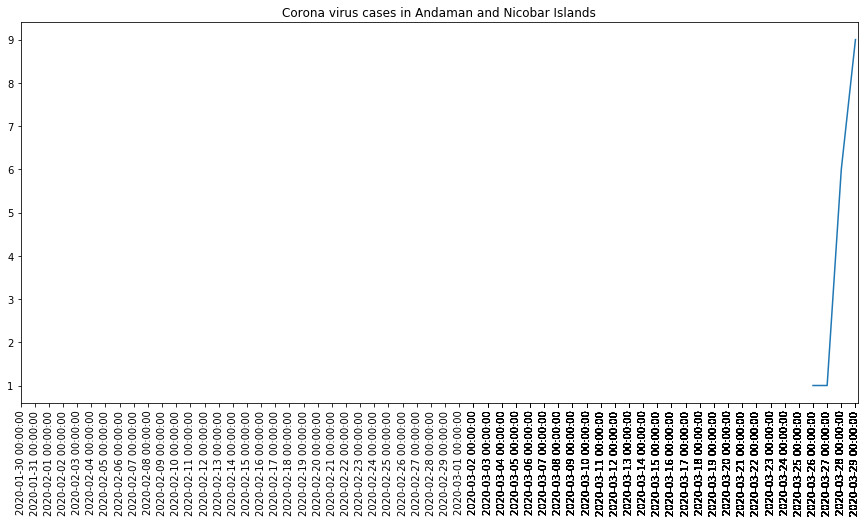

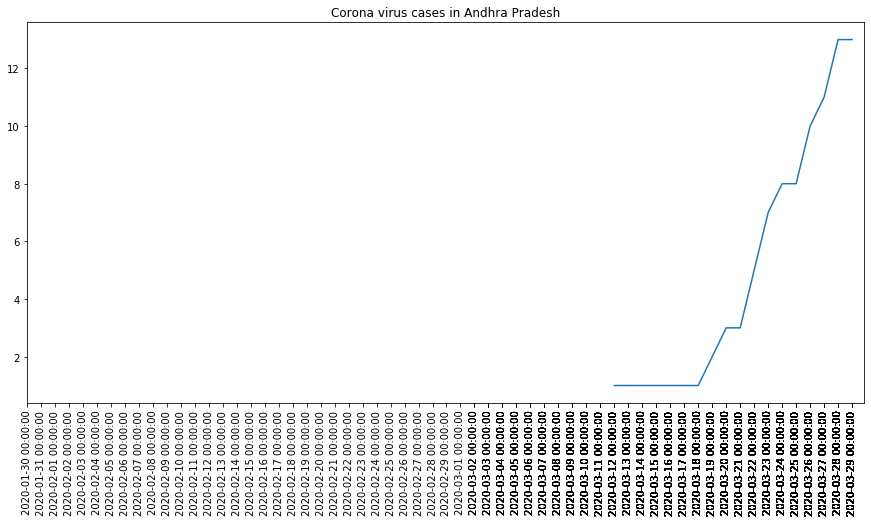

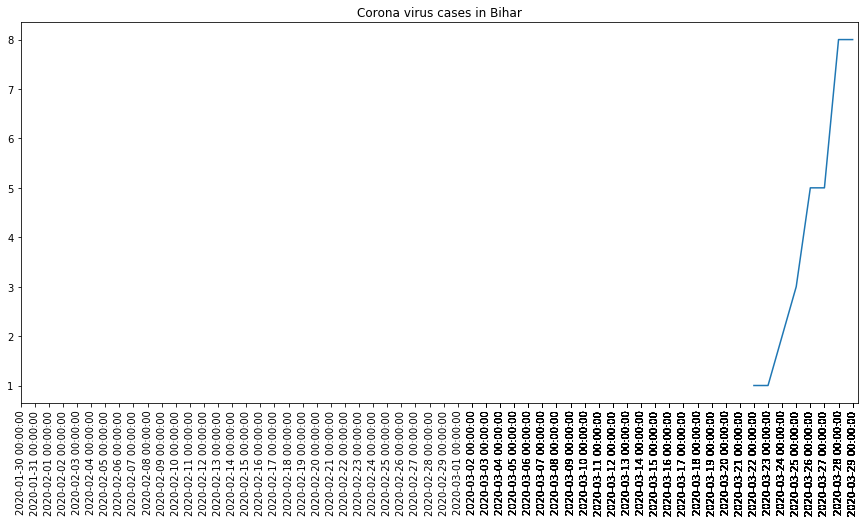

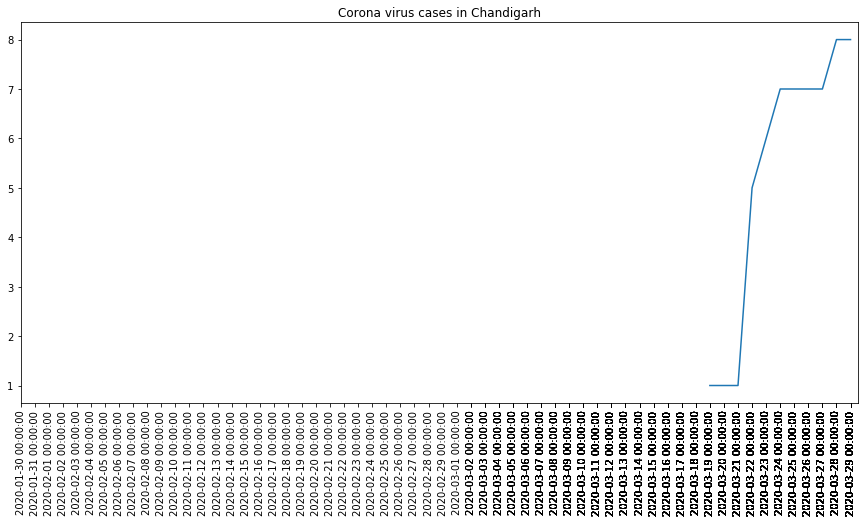

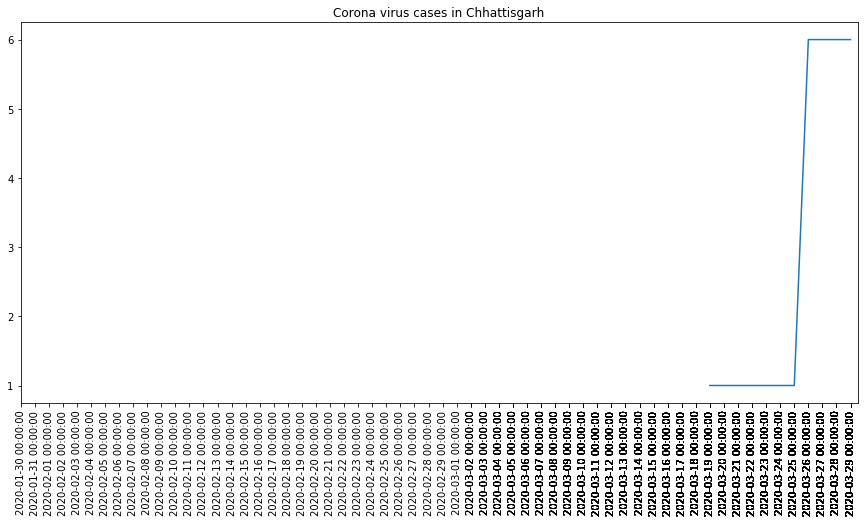

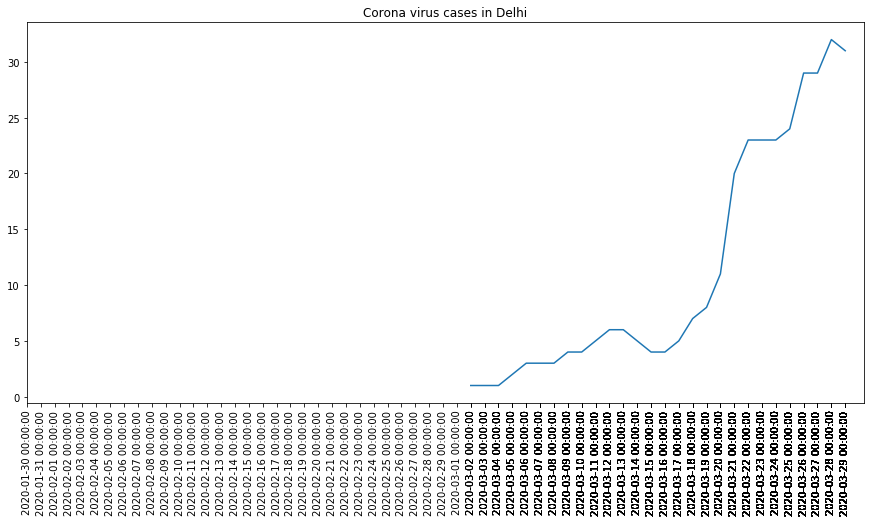

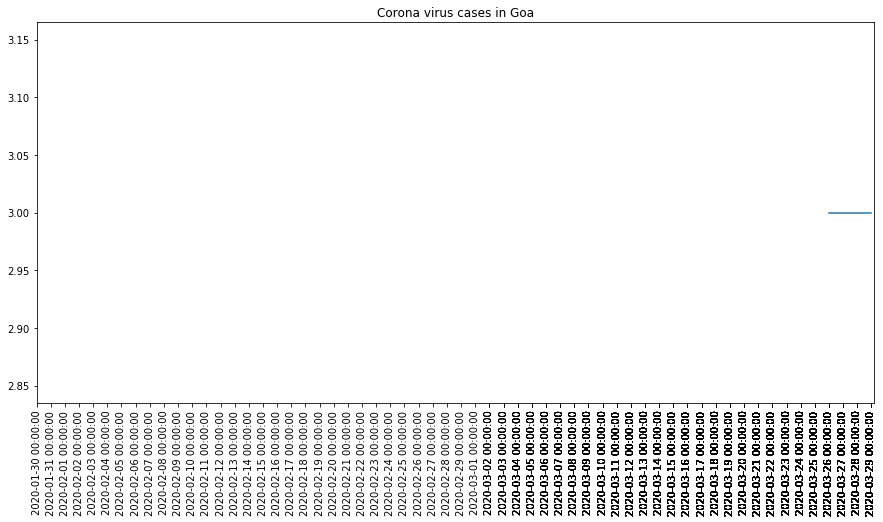

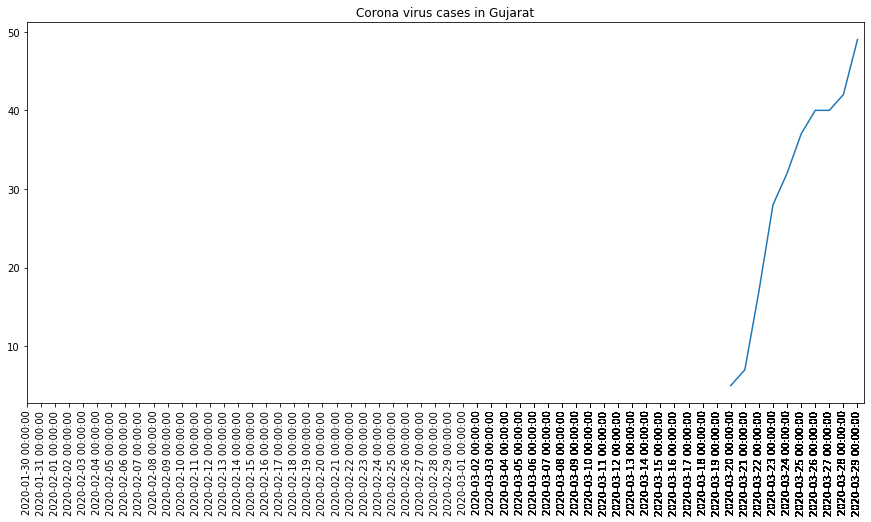

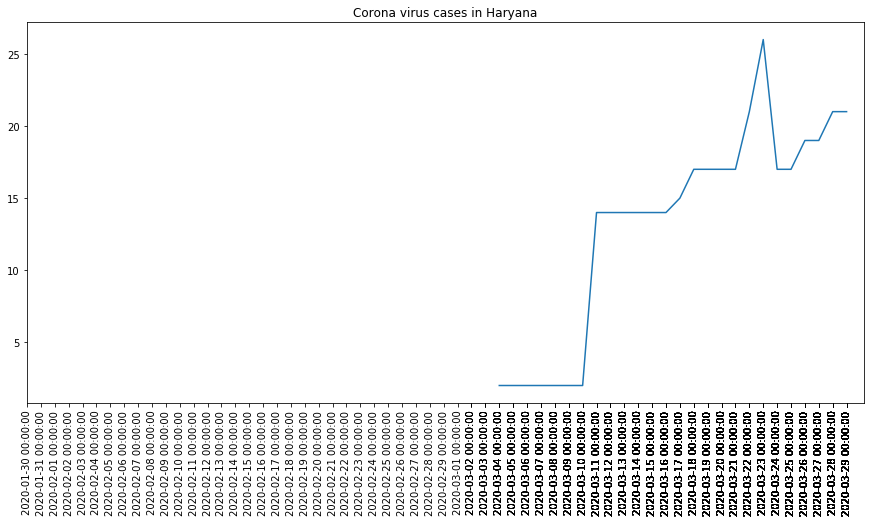

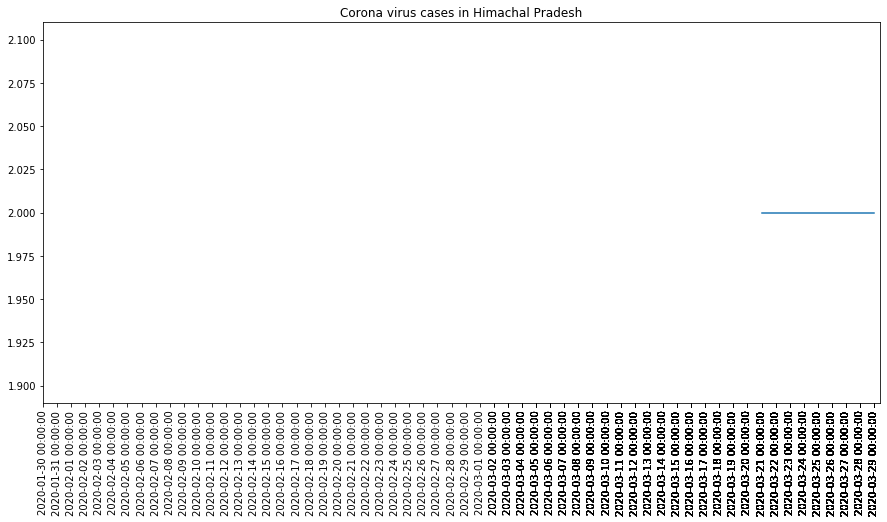

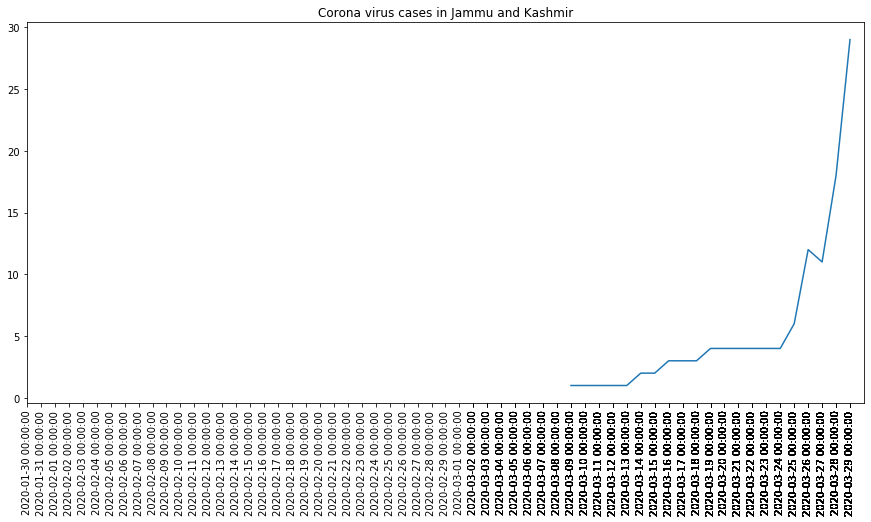

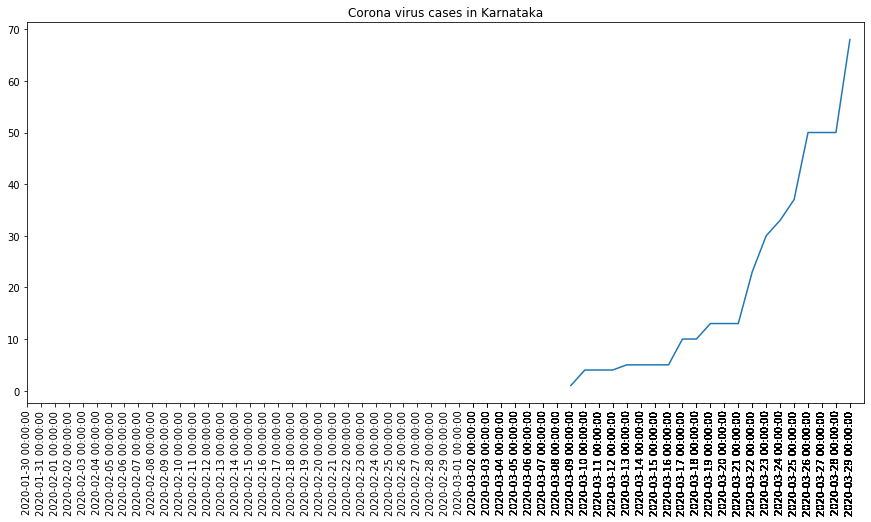

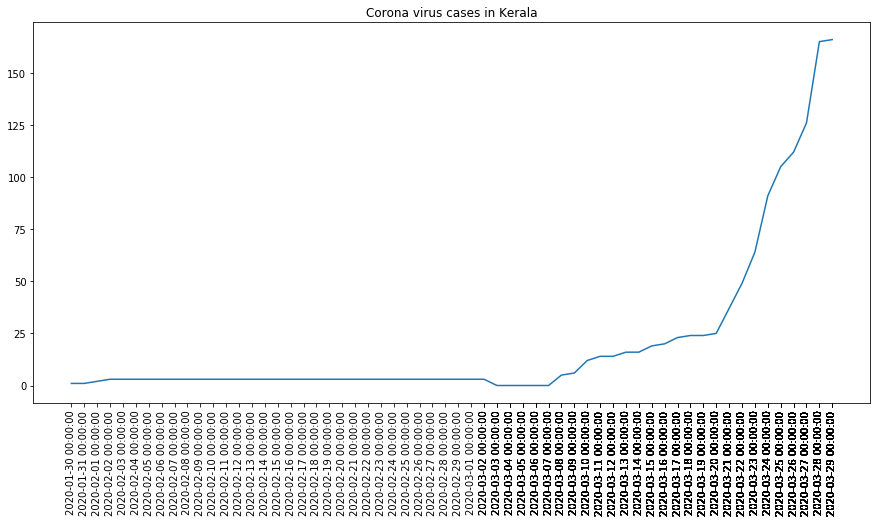

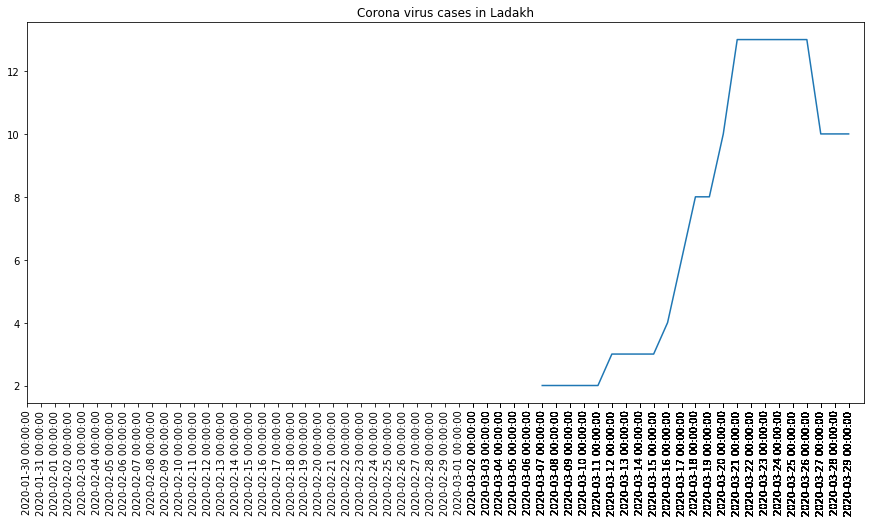

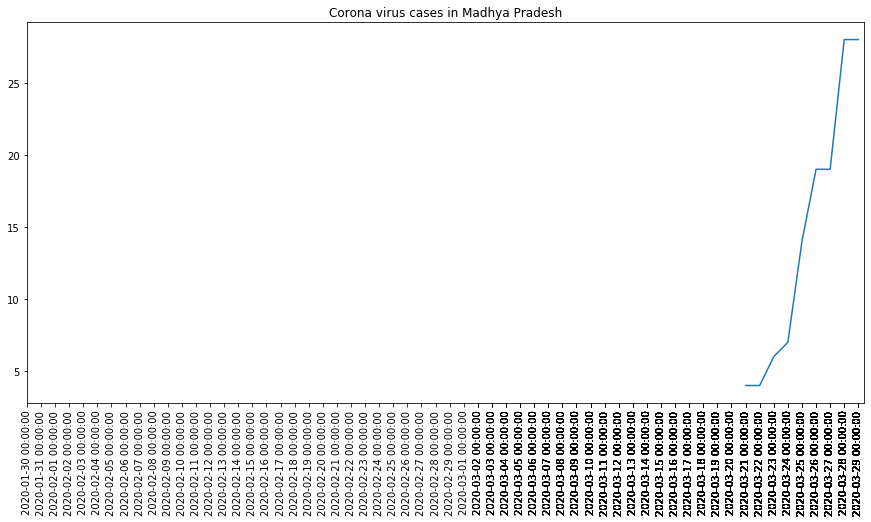

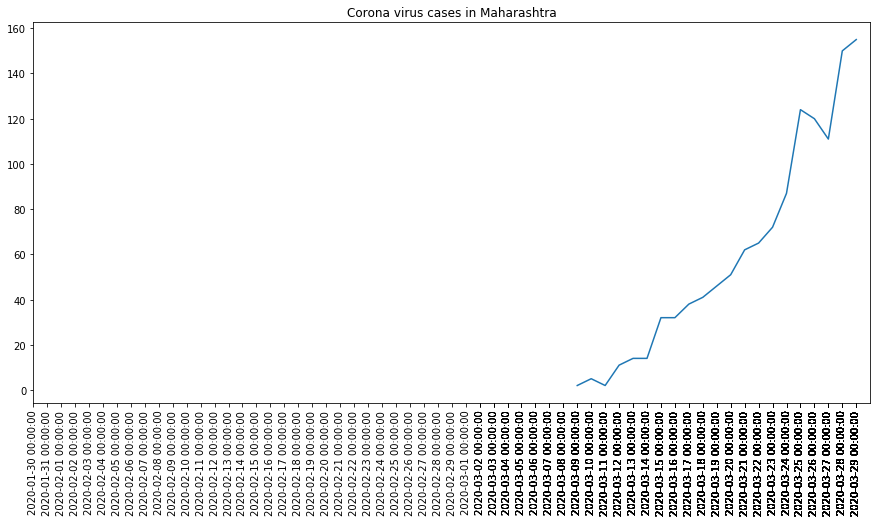

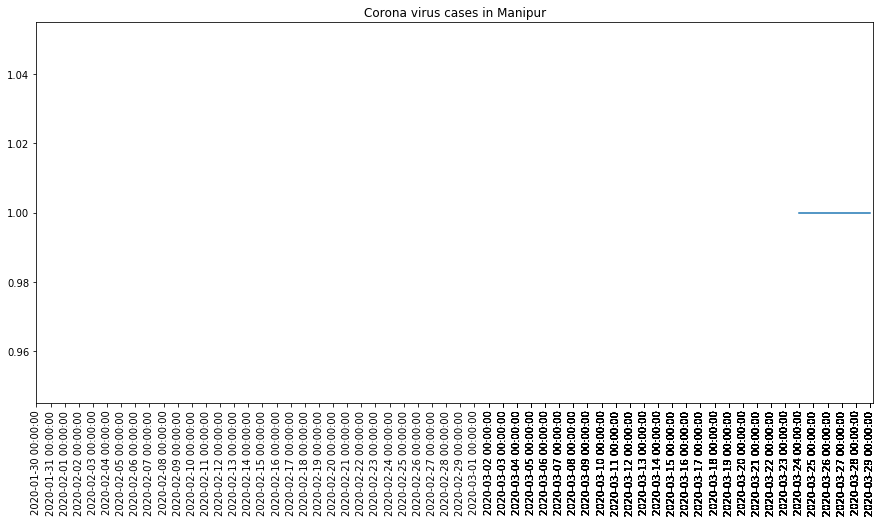

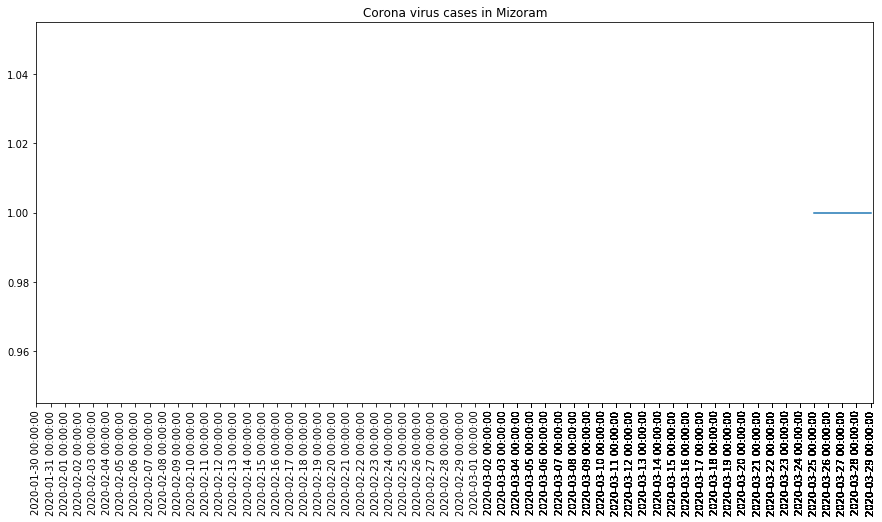

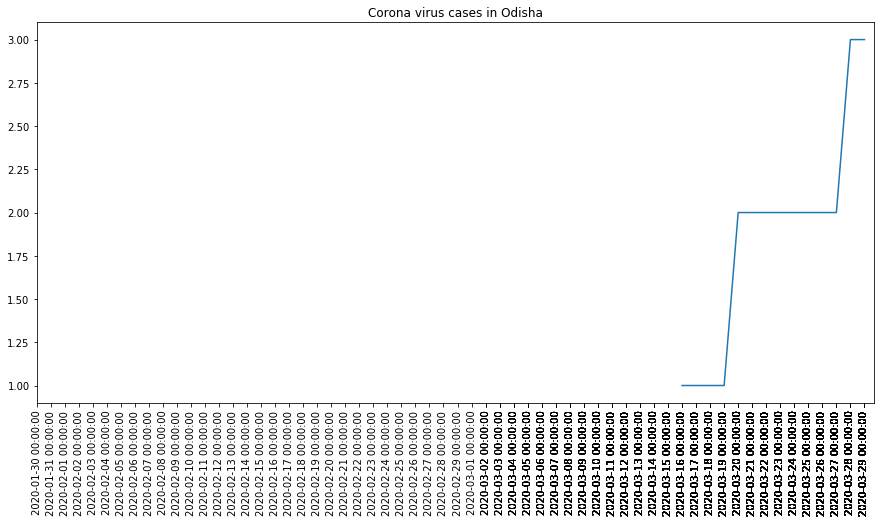

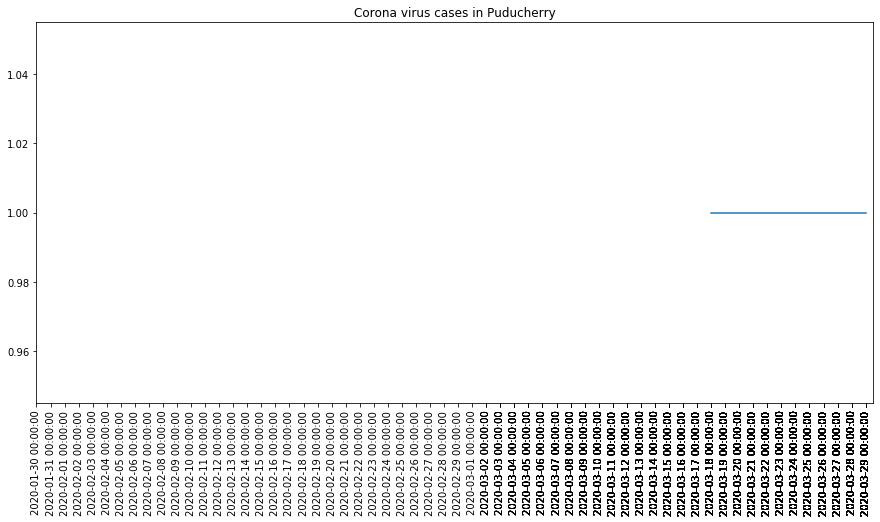

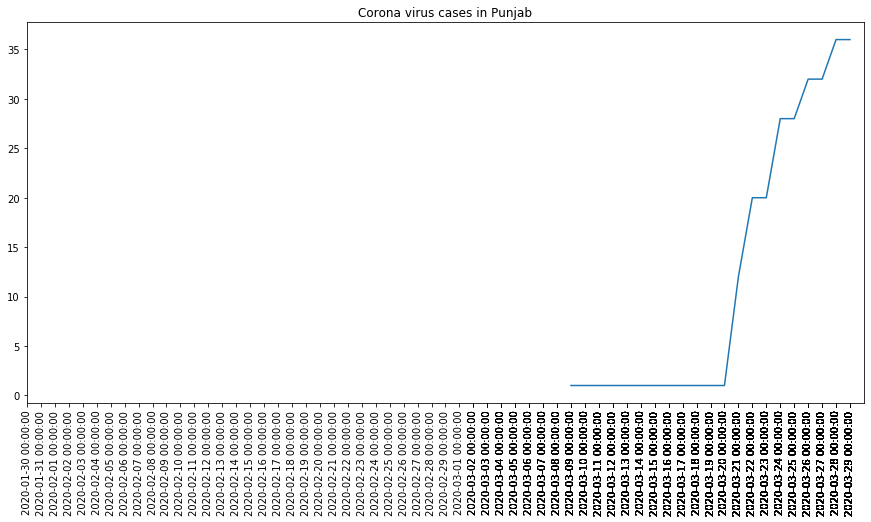

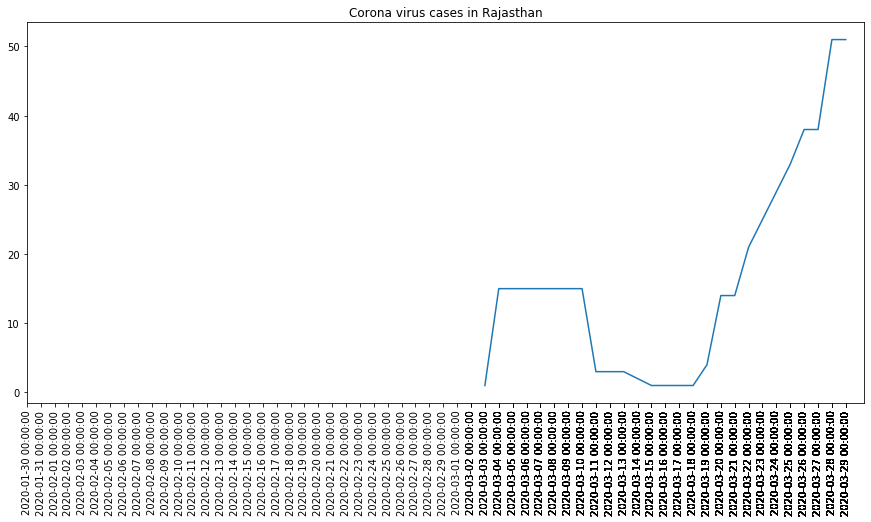

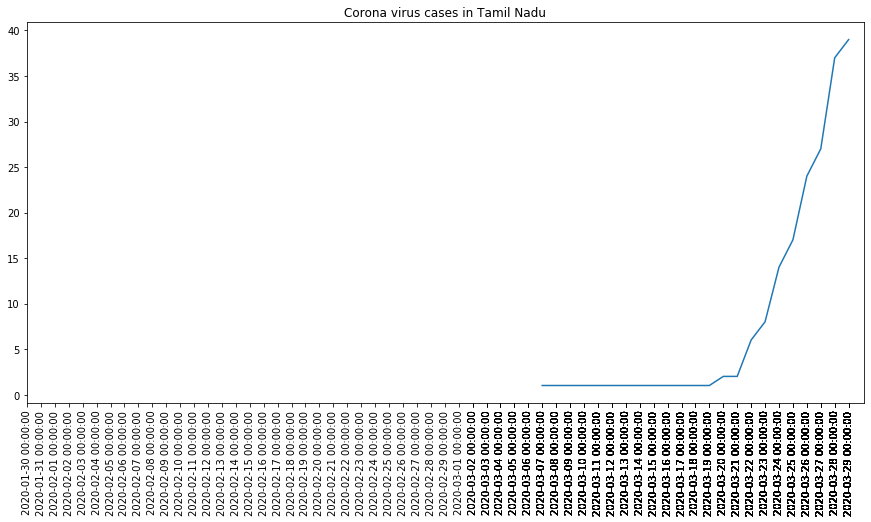

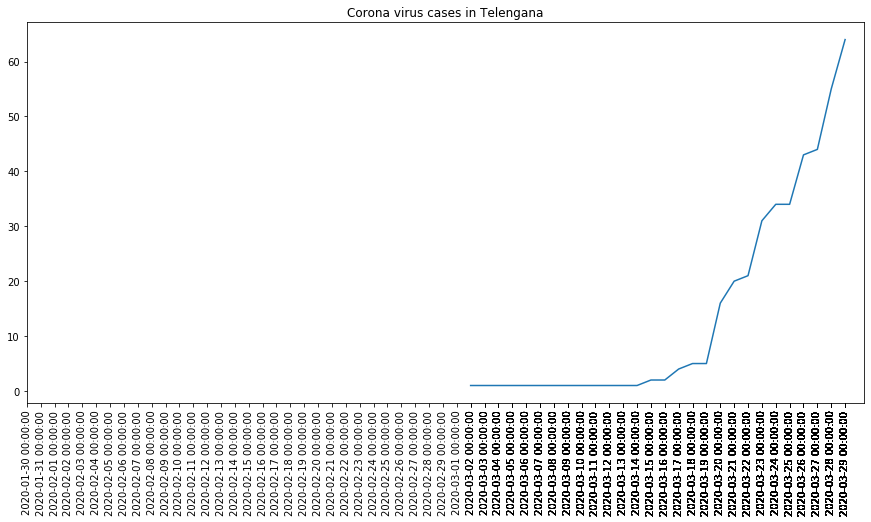

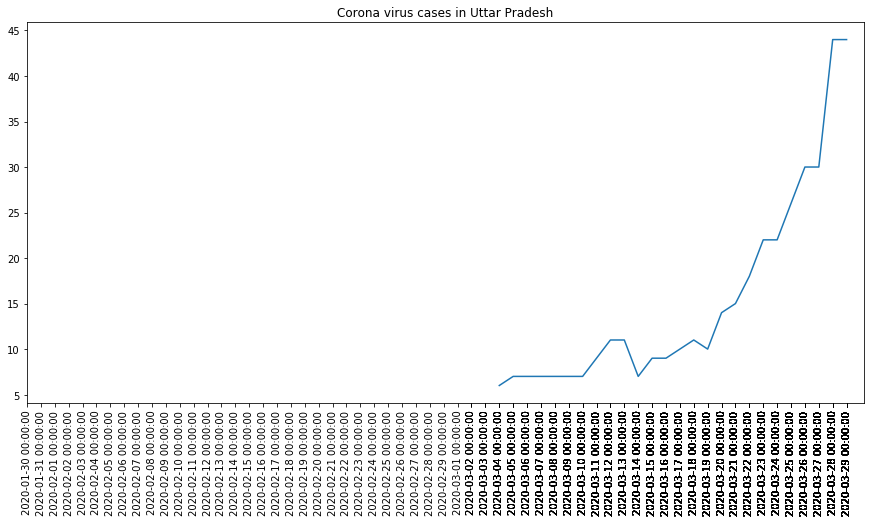

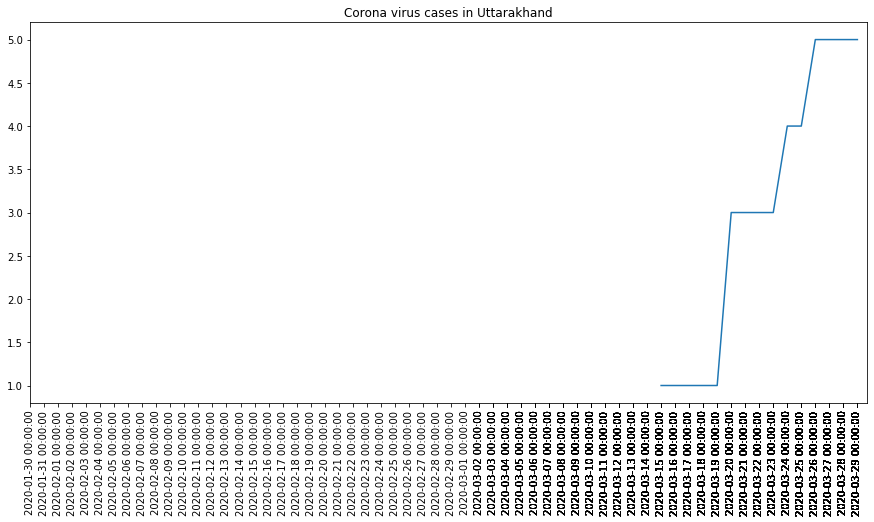

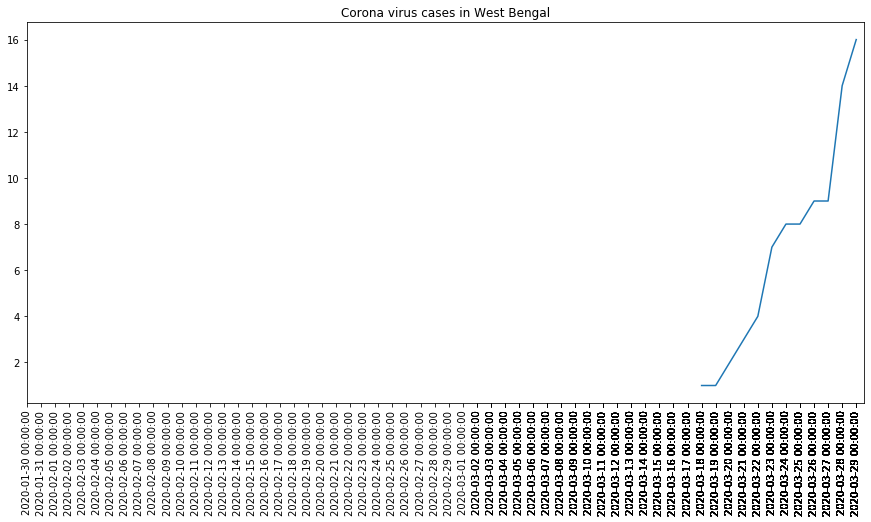

In [6]:
for state in unique_states:
    temp = []
    for ind, i in state_date.iterrows():
        if i["State/UnionTerritory"] == state:
            temp.append(i)
        
    temp = pd.DataFrame(temp)

    # plotting the number of cases versus date in India
    plt.figure(figsize = (15, 7))
    plt.plot(temp["Date"], temp["Active"])
    plt.xticks(date, date, rotation = 'vertical')
    plt.title("Corona virus cases in " + state)
    plt.figure(1, figsize = (8, 10))
    plt.show()

# Machine Learning Algorithms

## Linear Regression

Root Mean Square Error for Andaman and Nicobar Islands's Linear Regression:  1.3333333333333428
Root Mean Square Error for Andhra Pradesh's Linear Regression:  3.4706666665429524
Root Mean Square Error for Bihar's Linear Regression:  1.4727301994468684
Root Mean Square Error for Chandigarh's Linear Regression:  2.7191025207811736
Root Mean Square Error for Chhattisgarh's Linear Regression:  2.110928354662592
Root Mean Square Error for Delhi's Linear Regression:  9.877022490922917
Root Mean Square Error for Goa's Linear Regression:  0.0
Root Mean Square Error for Gujarat's Linear Regression:  8.491442270706099
Root Mean Square Error for Haryana's Linear Regression:  7.970213346552771
Root Mean Square Error for Himachal Pradesh's Linear Regression:  0.0
Root Mean Square Error for Jammu and Kashmir's Linear Regression:  12.385954136100768
Root Mean Square Error for Karnataka's Linear Regression:  22.347049581544322
Root Mean Square Error for Kerala's Linear Regression:  85.87410348937465


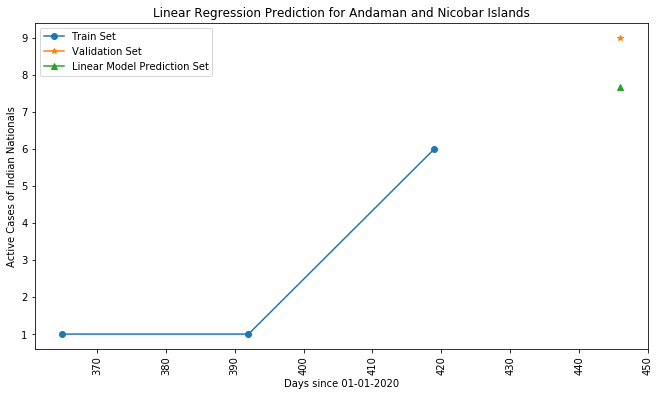

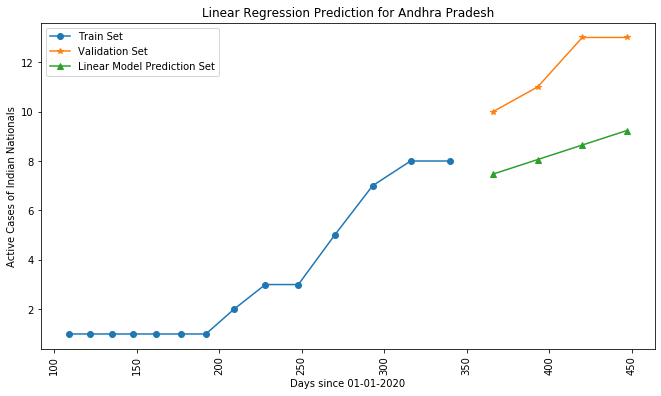

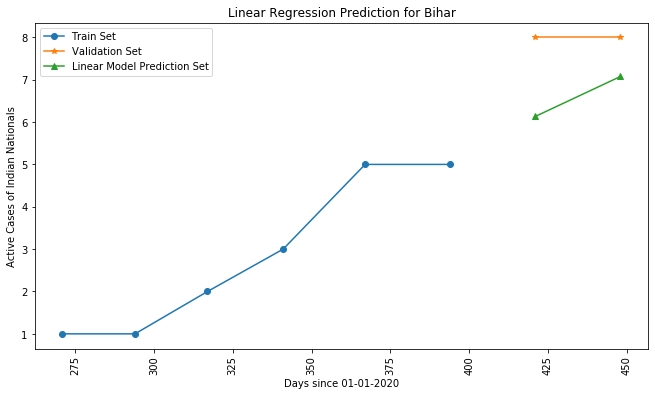

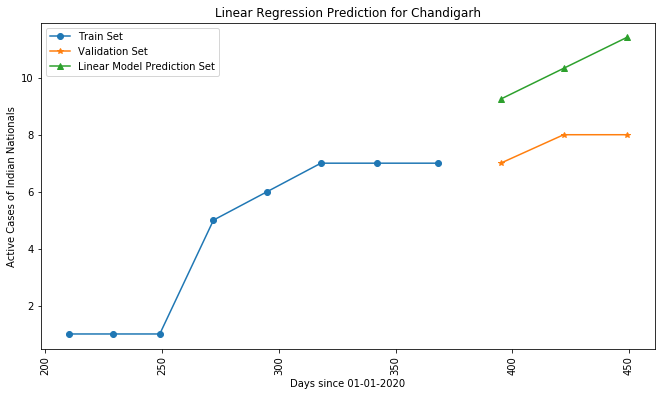

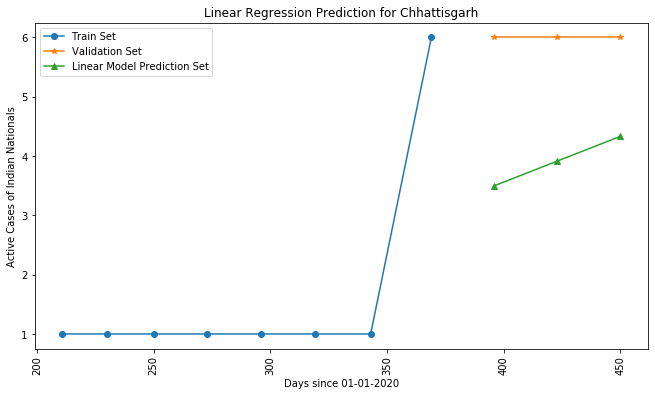

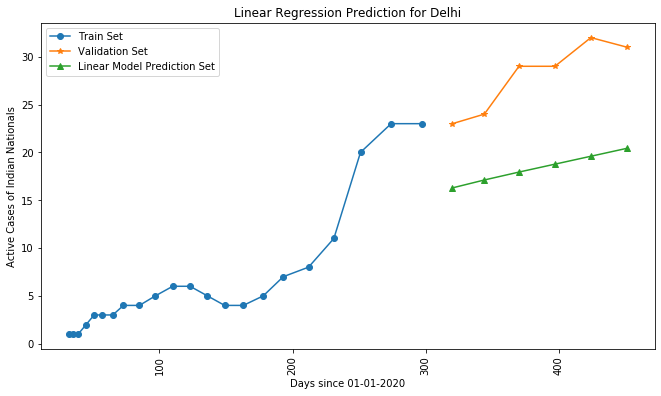

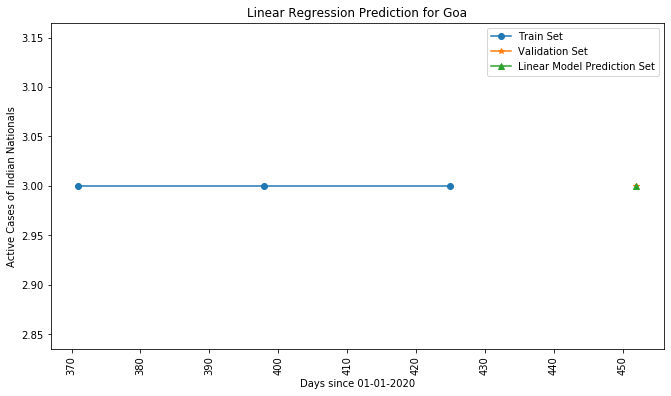

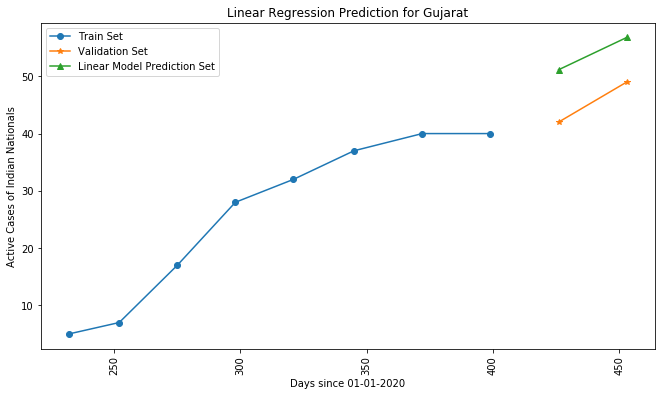

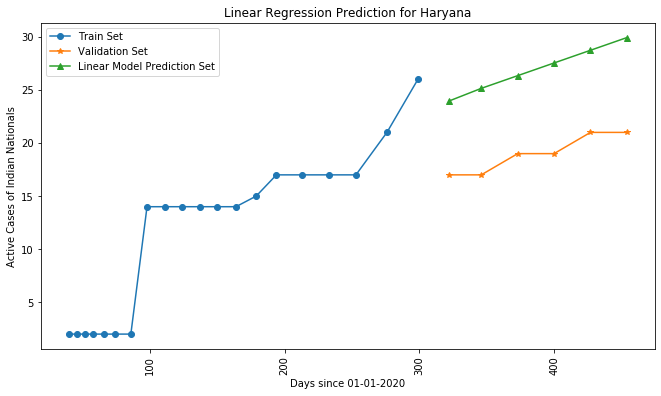

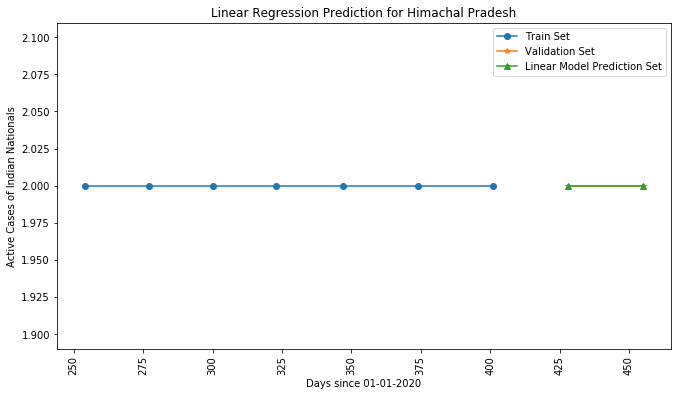

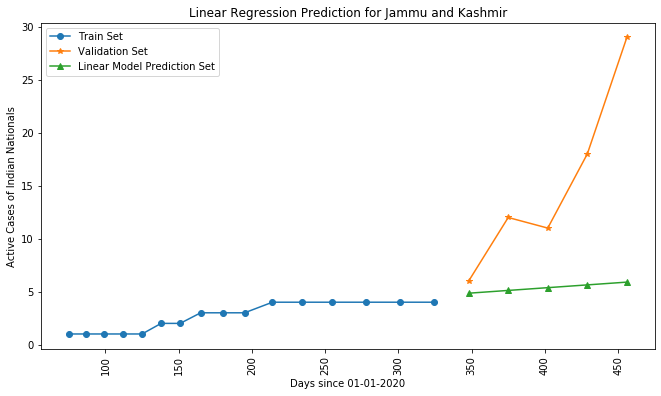

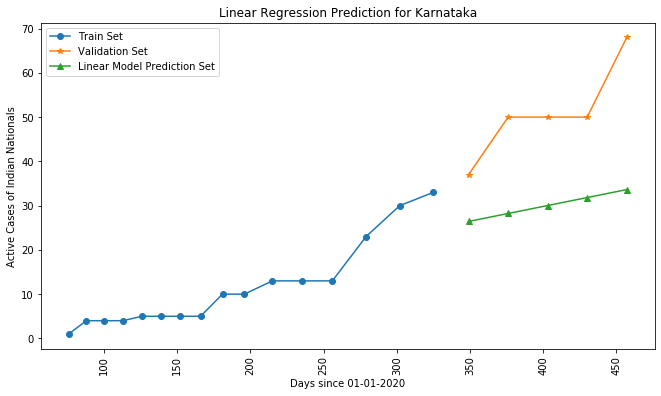

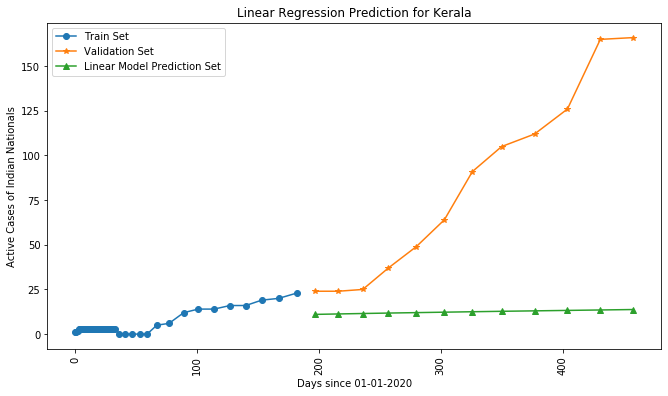

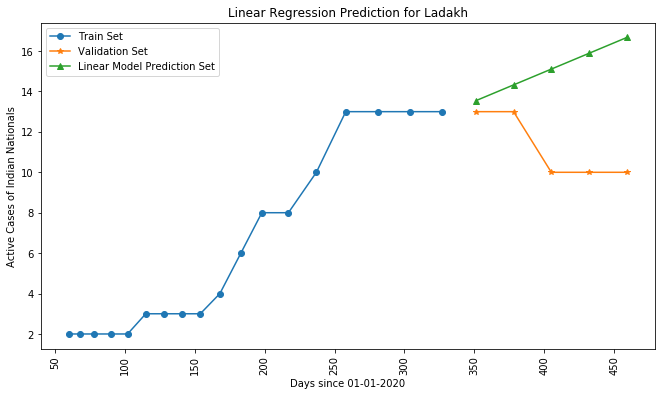

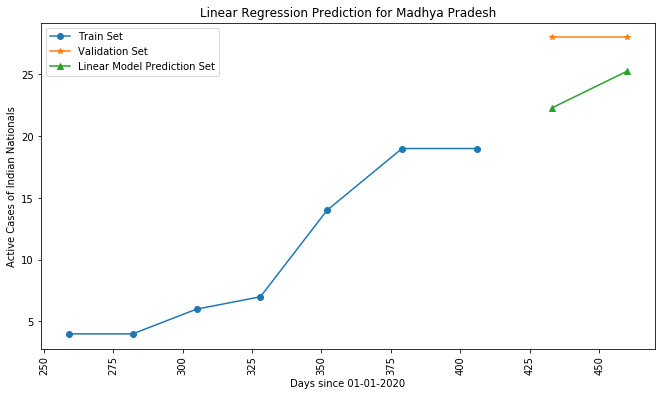

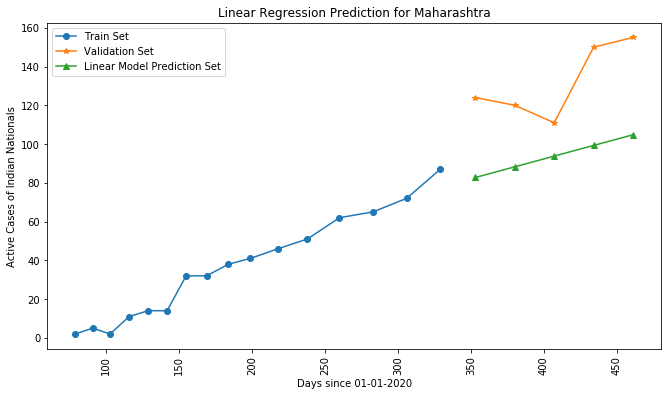

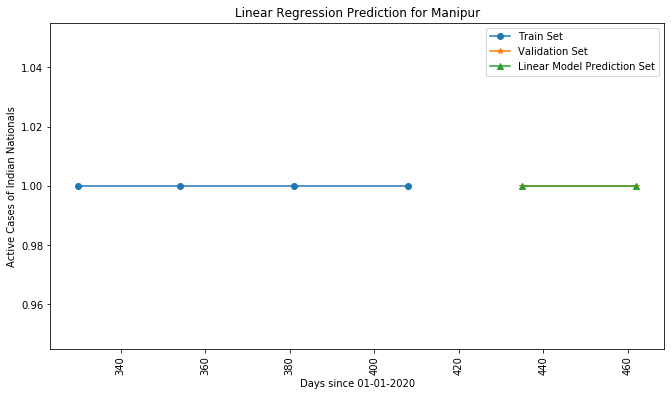

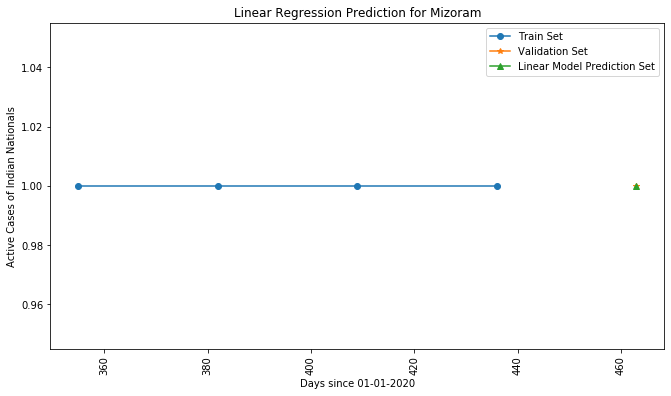

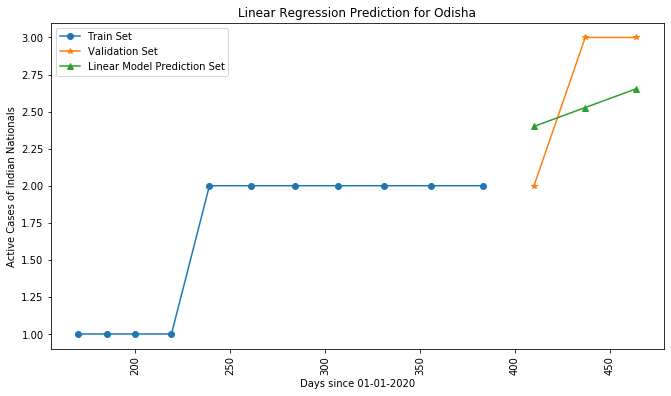

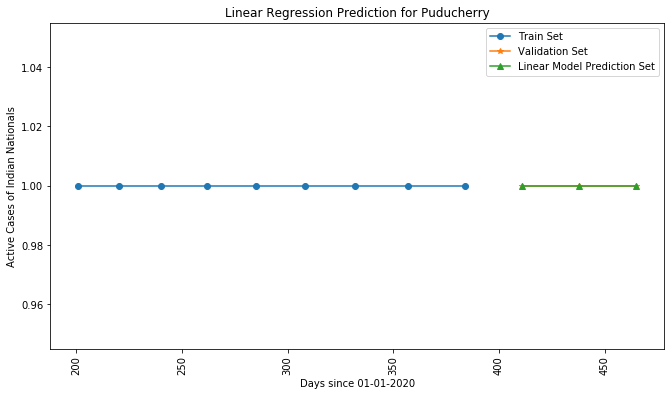

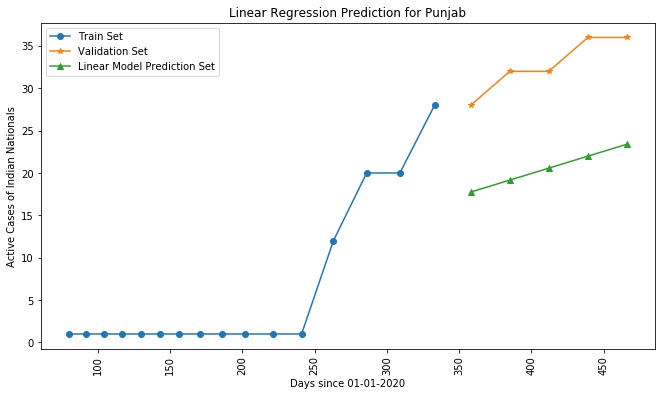

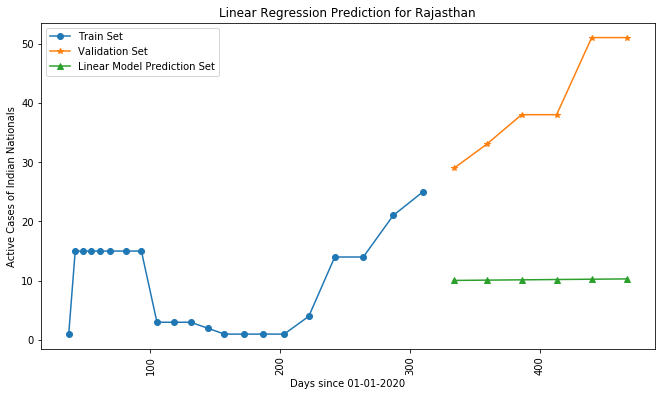

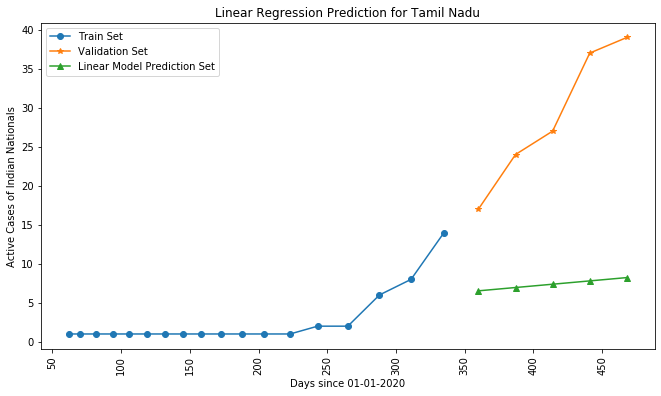

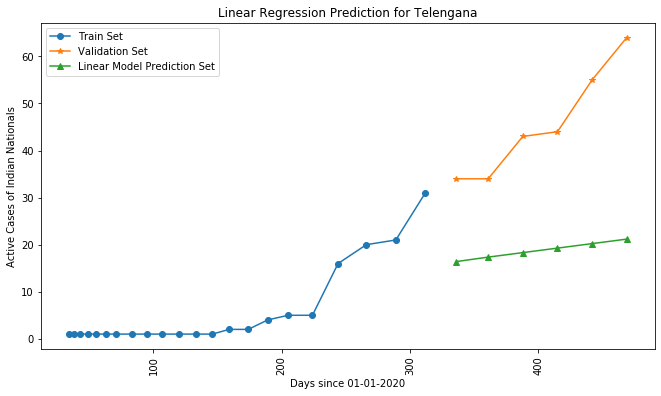

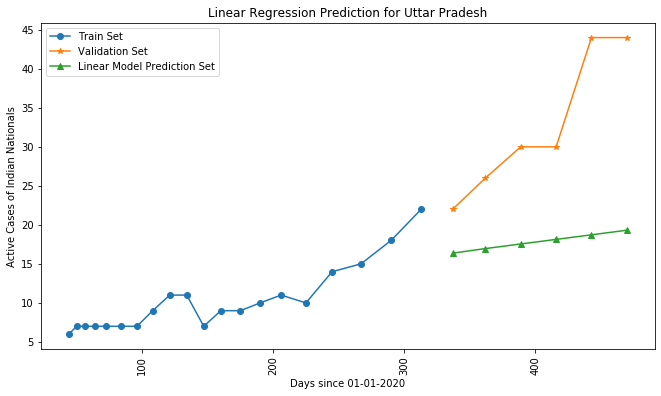

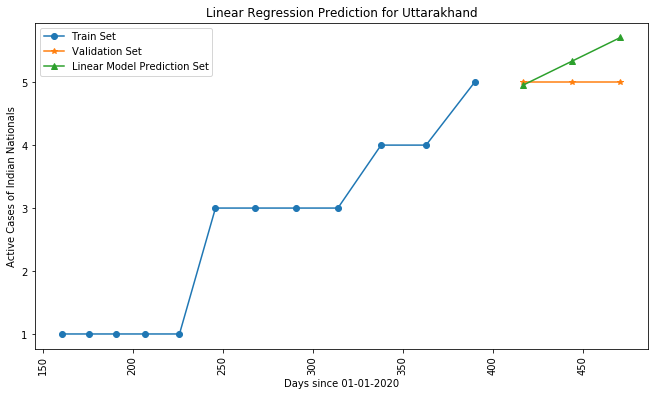

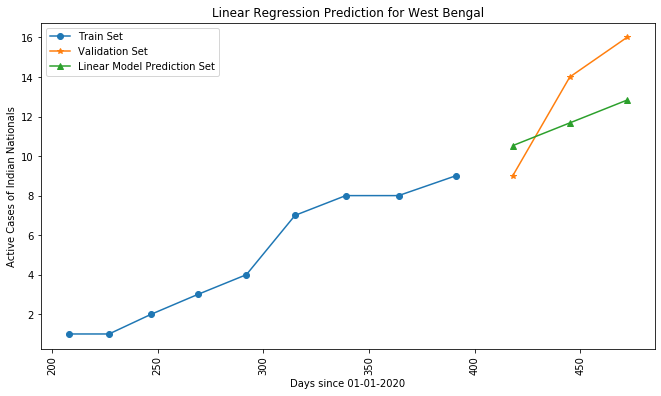

In [7]:
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.metrics import mean_squared_error

model_scores_linear = []

for state in unique_states:
    temp = []
    
    for ind, i in state_date.iterrows():
        if i["State/UnionTerritory"] == state:
            temp.append(i)
        
    temp = pd.DataFrame(temp)
    temp = temp[["Active", "Days Since"]]

    train_ml = temp.iloc[: int(temp.shape[0] * 0.8)]
    valid_ml = temp.iloc[int(temp.shape[0] * 0.8):]
    y_pred = valid_ml.copy()
    
    try:
        lin_reg = LinearRegression()
        lin_reg.fit(np.array(train_ml["Days Since"]).reshape(-1,1), np.array(train_ml["Active"]).reshape(-1,1))
        # making the predictions
        prediction_valid_linreg = lin_reg.predict(np.array(valid_ml["Days Since"]).reshape(-1,1))
        y_pred["Linear Regression Model Prediction"] = list(prediction_valid_linreg)
        
        # printing the root mean square error
        model_scores_linear.append(("MSE for " + state + " = ", np.sqrt(mean_squared_error(valid_ml["Active"], prediction_valid_linreg))))
        print("Root Mean Square Error for " + state + "'s Linear Regression: ", np.sqrt(mean_squared_error(valid_ml["Active"], prediction_valid_linreg)))
        
        # plotting the predictions by the model
        plt.figure(figsize = (11, 6))
        plt.plot(train_ml.index, train_ml["Active"], label = "Train Set", marker = 'o')
        plt.plot(valid_ml.index, valid_ml["Active"], label = "Validation Set", marker = '*')
        plt.plot(y_pred["Linear Regression Model Prediction"], label = "Linear Model Prediction Set", marker = '^')
        plt.legend()
        plt.xlabel("Days since 01-01-2020")
        plt.ylabel("Active Cases of Indian Nationals")
        plt.title("Linear Regression Prediction for " + state)
        plt.xticks(rotation = 90)
    except:
        print("Couldn't carry out Linear Regression for " + state)

## Polynomial Regression

Couldn't carry out Polynomial Regression for Andaman and Nicobar Islands
Couldn't carry out Polynomial Regression for Andhra Pradesh
Couldn't carry out Polynomial Regression for Bihar
Root Mean Square Error for Chandigarh's Polynomial Regression:  41.30823092930543
Root Mean Square Error for Chhattisgarh's Polynomial Regression:  100.13696040914203
Couldn't carry out Polynomial Regression for Delhi
Couldn't carry out Polynomial Regression for Goa
Couldn't carry out Polynomial Regression for Gujarat
Couldn't carry out Polynomial Regression for Haryana
Couldn't carry out Polynomial Regression for Himachal Pradesh
Couldn't carry out Polynomial Regression for Jammu and Kashmir
Couldn't carry out Polynomial Regression for Karnataka
Couldn't carry out Polynomial Regression for Kerala
Couldn't carry out Polynomial Regression for Ladakh
Couldn't carry out Polynomial Regression for Madhya Pradesh
Couldn't carry out Polynomial Regression for Maharashtra
Couldn't carry out Polynomial Regression f

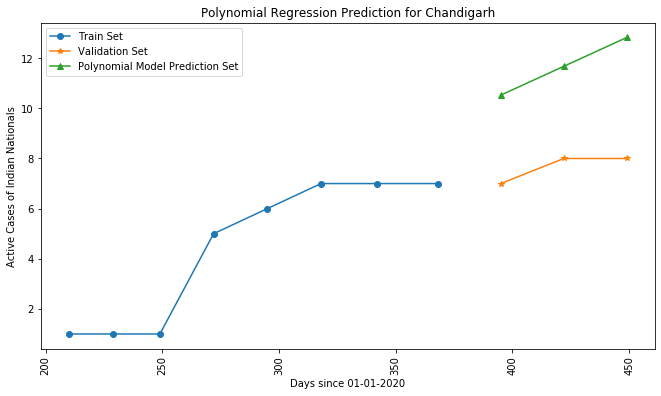

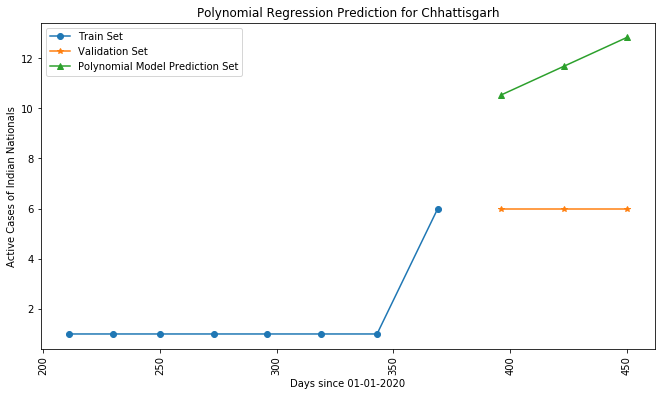

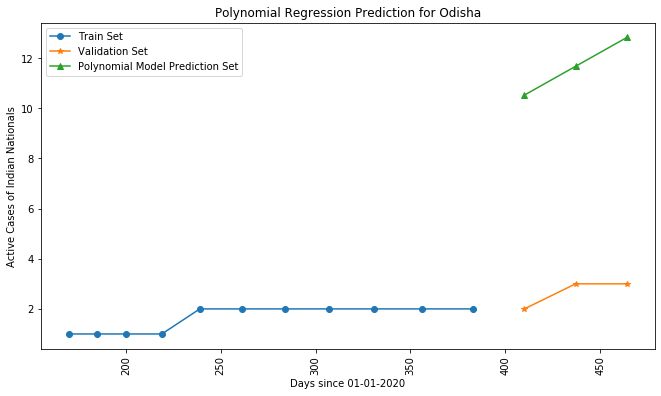

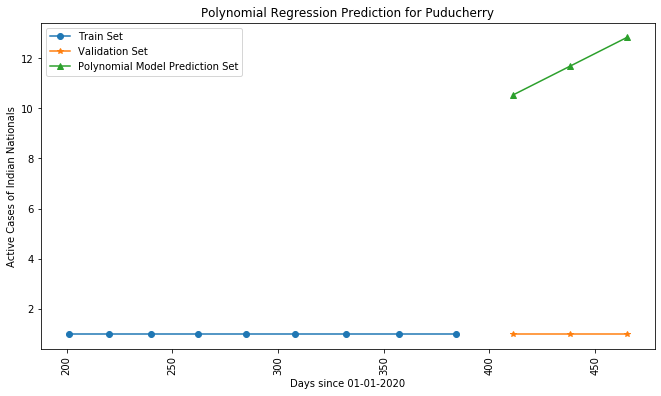

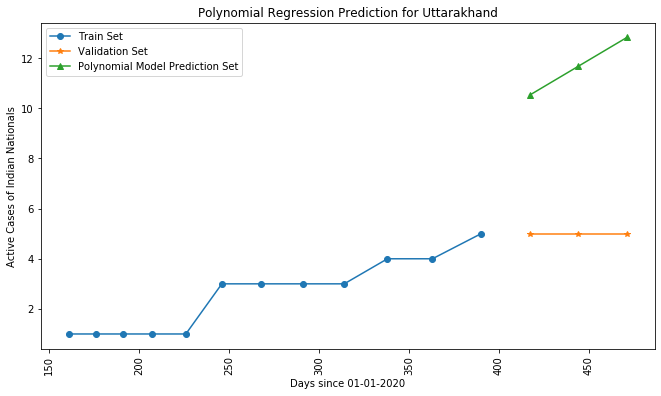

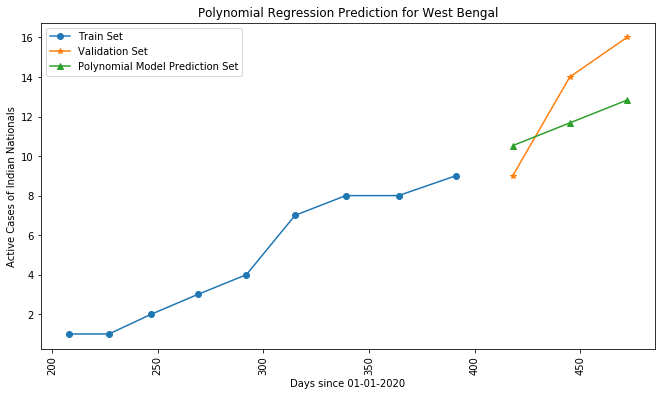

In [8]:
from sklearn.preprocessing import PolynomialFeatures

model_scores_polynomial = []

for state in unique_states:
    temp = []
    
    for ind, i in state_date.iterrows():
        if i["State/UnionTerritory"] == state:
            temp.append(i)
        
    temp = pd.DataFrame(temp)
    temp = temp[["Active", "Days Since"]]

    train_ml = temp.iloc[: int(temp.shape[0] * 0.8)]
    valid_ml = temp.iloc[int(temp.shape[0] * 0.8):]
    y_pred = valid_ml.copy()
    
    
    try:
        poly_reg = PolynomialFeatures(degree = 6) 
        X_poly = poly_reg.fit_transform(np.array(train_ml["Days Since"]).reshape(-1,1))
        poly_reg.fit(X_poly, np.array(train_ml["Active"]).reshape(-1,1))
        lin_reg = LinearRegression()
        lin_reg.fit(X_poly, np.array(train_ml["Active"]).reshape(-1,1))
        # making the predictions
        prediction_valid_polyreg = lin_reg.predict(poly_reg.fit_transform(np.array(valid_ml["Days Since"]).reshape(-1,1)))
        y_pred["Polynomial Regression Model Prediction"] = list(prediction_valid_linreg)
        
        # printing the root mean square error
        model_scores_polynomial.append(("MSE for " + state + " = ", np.sqrt(mean_squared_error(valid_ml["Active"], prediction_valid_polyreg))))
        print("Root Mean Square Error for " + state + "'s Polynomial Regression: ", np.sqrt(mean_squared_error(valid_ml["Active"], prediction_valid_polyreg)))
        
        # plotting the predictions by the model
        plt.figure(figsize = (11, 6))
        plt.plot(train_ml.index, train_ml["Active"], label = "Train Set", marker = 'o')
        plt.plot(valid_ml.index, valid_ml["Active"], label = "Validation Set", marker = '*')
        plt.plot(y_pred["Polynomial Regression Model Prediction"], label = "Polynomial Model Prediction Set", marker = '^')
        plt.legend()
        plt.xlabel("Days since 01-01-2020")
        plt.ylabel("Active Cases of Indian Nationals")
        plt.title("Polynomial Regression Prediction for " + state)
        plt.xticks(rotation = 90)
    except:
        print("Couldn't carry out Polynomial Regression for " + state)

## LASSO Regression

Root Mean Square Error for Andaman and Nicobar Islands's LASSO Regression:  1.3333333333333428
Root Mean Square Error for Andhra Pradesh's LASSO Regression:  3.4706666665429524
Root Mean Square Error for Bihar's LASSO Regression:  1.4727301994468684
Root Mean Square Error for Chandigarh's LASSO Regression:  2.7191025207811736
Root Mean Square Error for Chhattisgarh's LASSO Regression:  2.110928354662591
Root Mean Square Error for Delhi's LASSO Regression:  9.877022490922917
Root Mean Square Error for Goa's LASSO Regression:  0.0
Root Mean Square Error for Gujarat's LASSO Regression:  8.491442270706129
Root Mean Square Error for Haryana's LASSO Regression:  7.970213346552771
Root Mean Square Error for Himachal Pradesh's LASSO Regression:  0.0
Root Mean Square Error for Jammu and Kashmir's LASSO Regression:  12.385954136100766
Root Mean Square Error for Karnataka's LASSO Regression:  22.347049581544315
Root Mean Square Error for Kerala's LASSO Regression:  85.87410348937465
Root Mean Squ

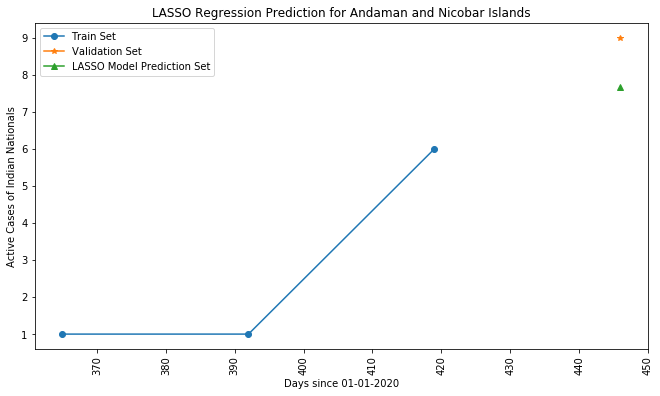

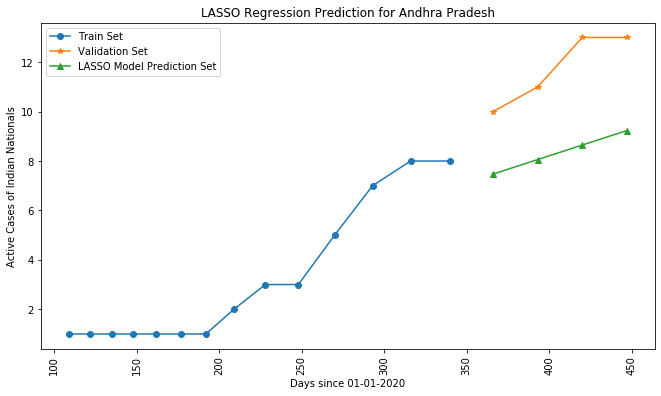

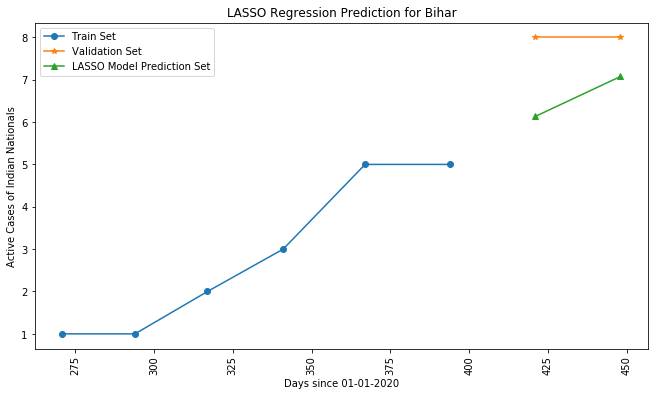

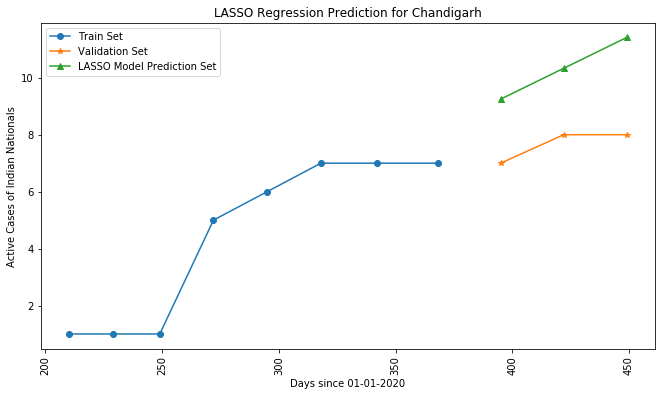

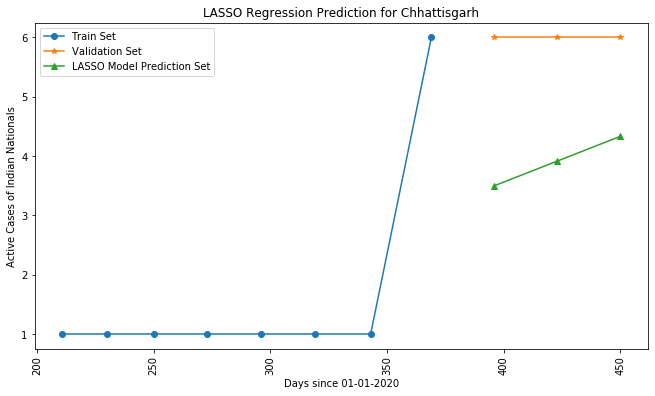

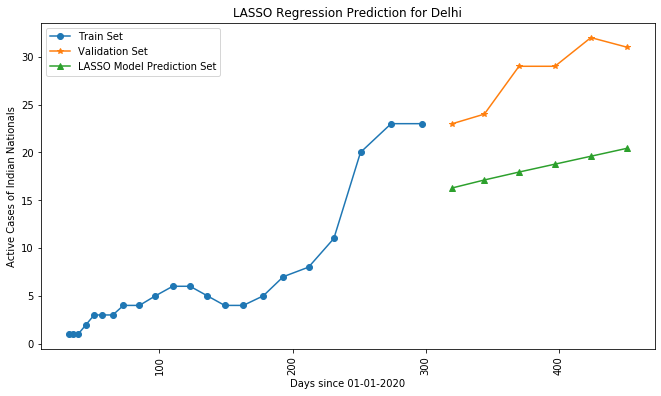

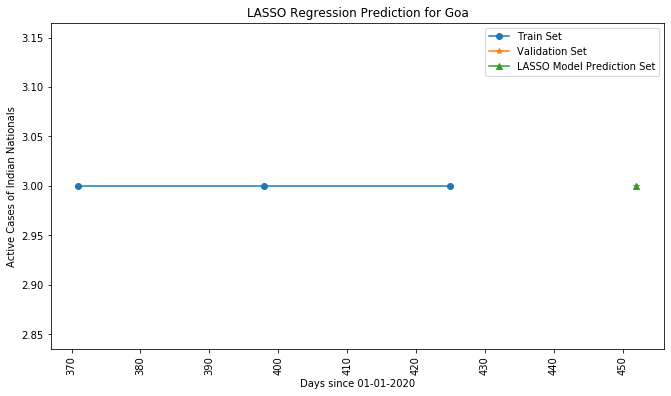

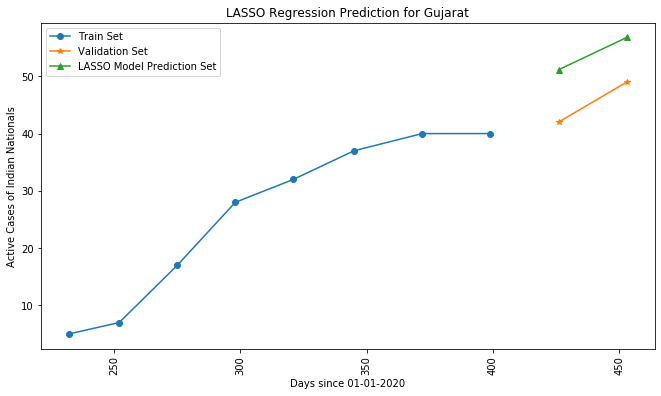

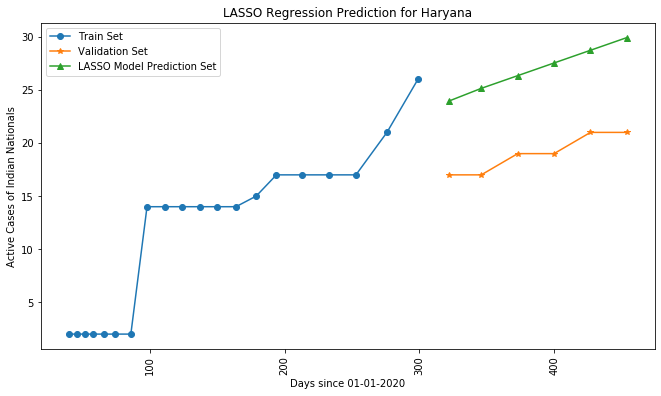

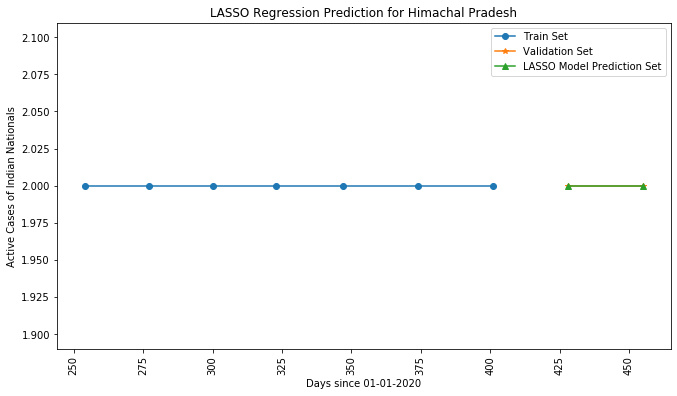

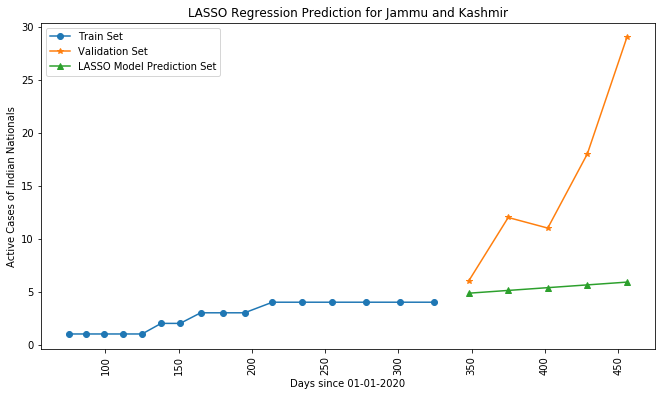

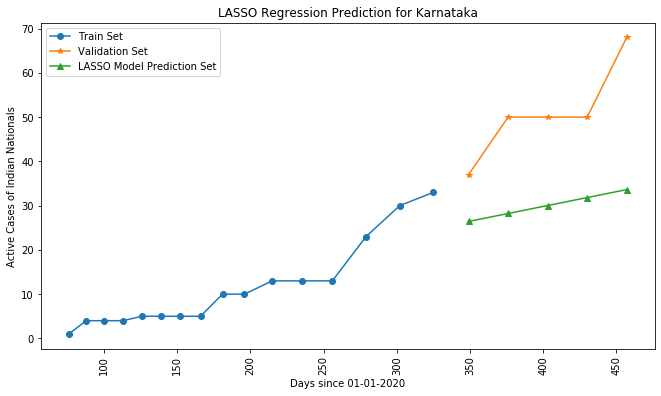

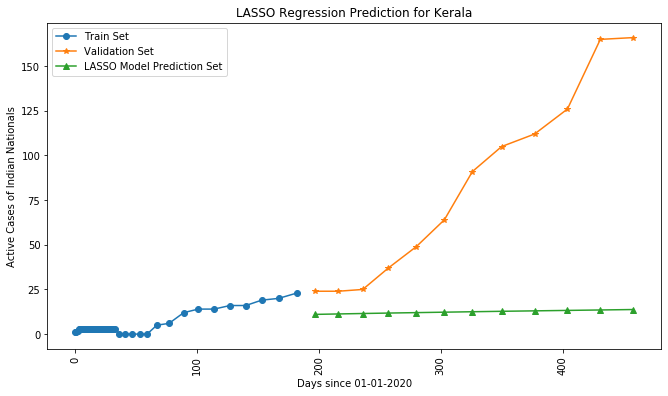

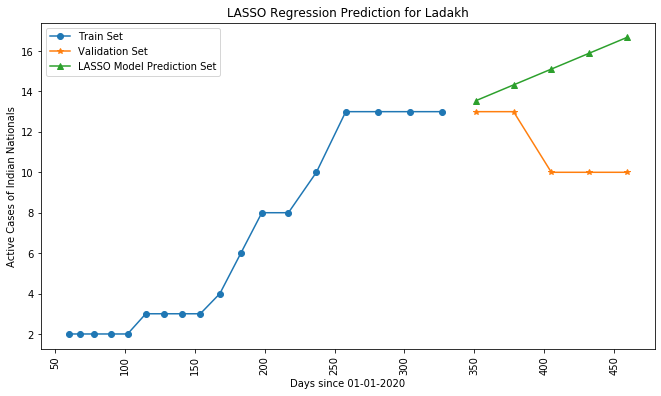

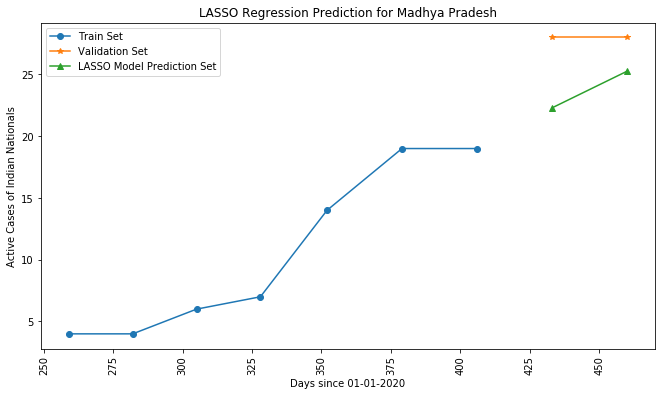

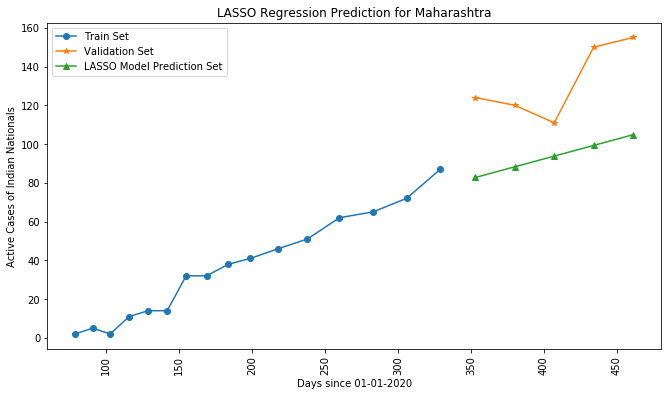

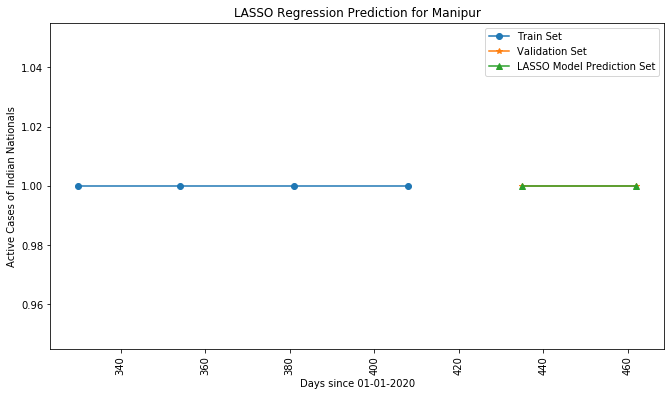

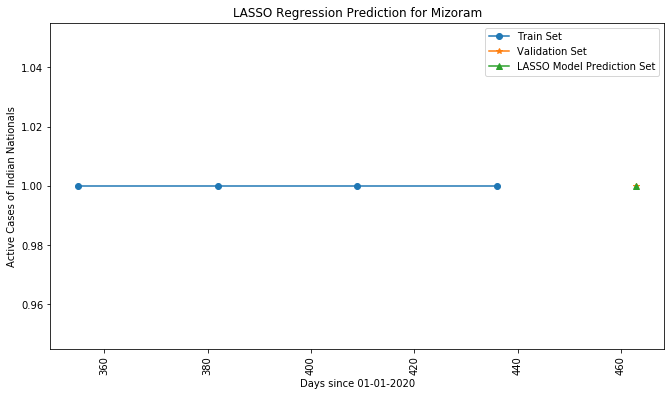

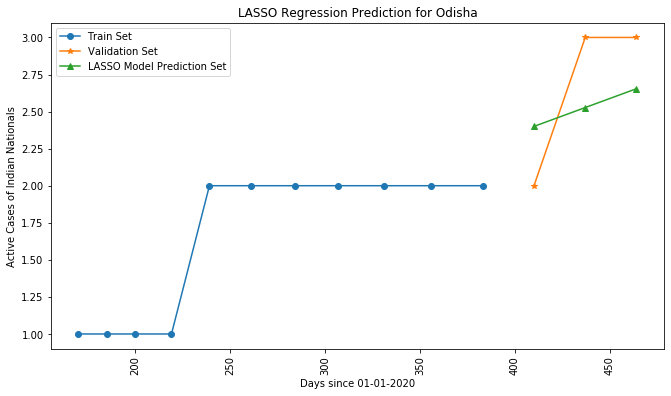

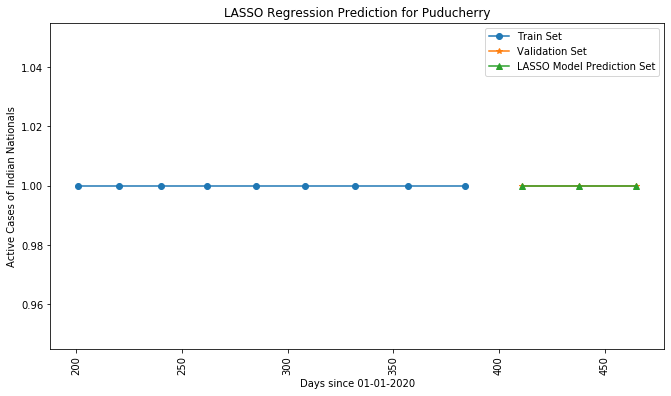

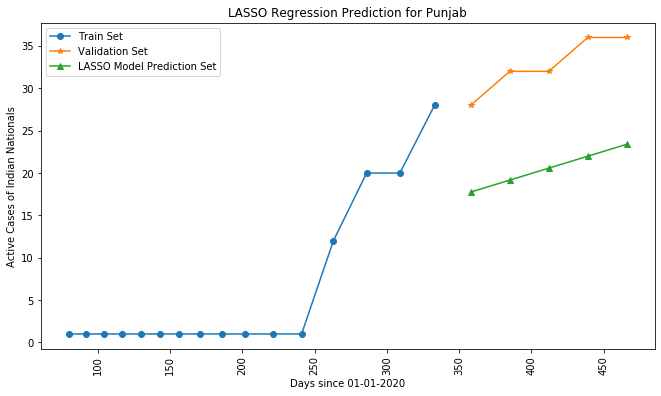

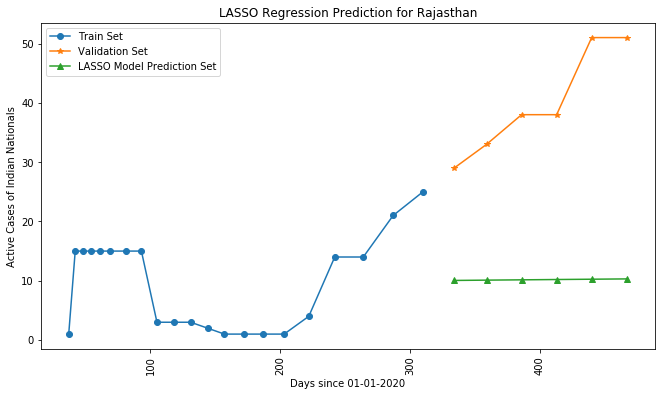

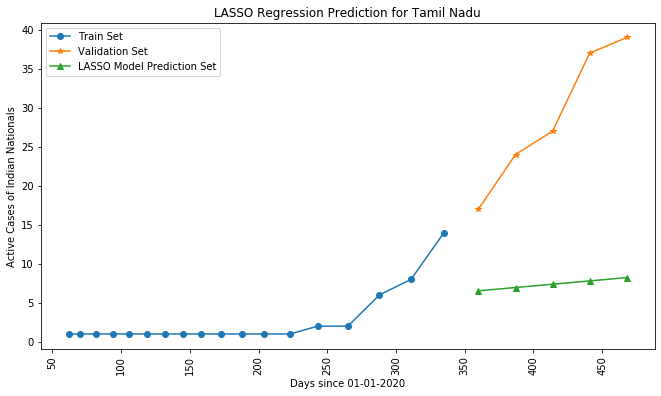

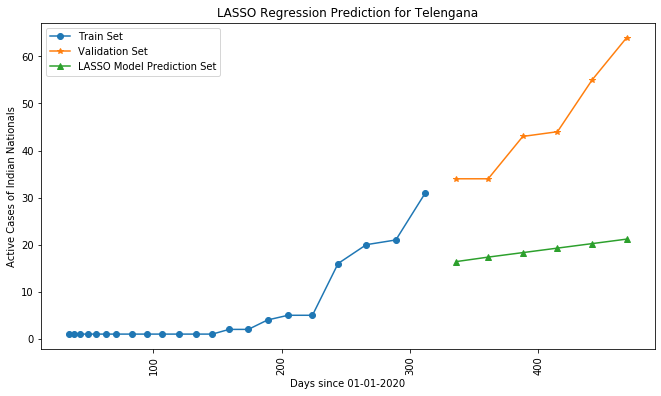

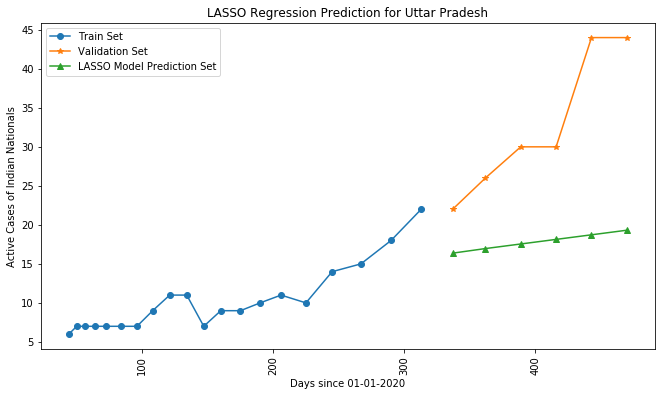

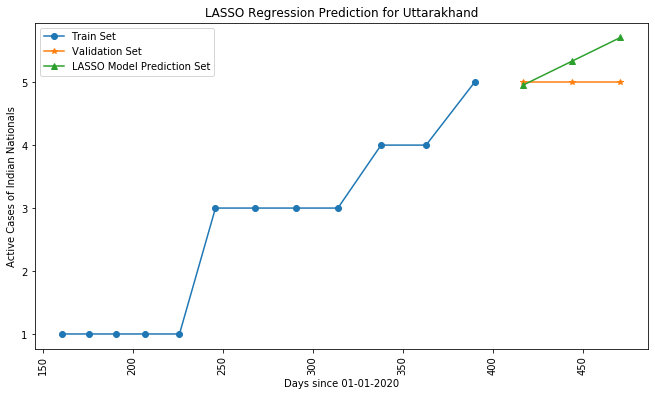

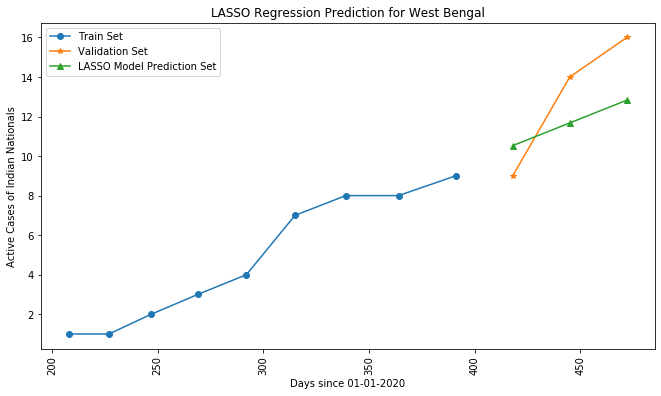

In [9]:
# importing the requisite library and making and training the model
from sklearn.linear_model import Lasso

model_scores_lasso = []

for state in unique_states:
    temp = []
    
    for ind, i in state_date.iterrows():
        if i["State/UnionTerritory"] == state:
            temp.append(i)
        
    temp = pd.DataFrame(temp)
    temp = temp[["Active", "Days Since"]]

    train_ml = temp.iloc[: int(temp.shape[0] * 0.8)]
    valid_ml = temp.iloc[int(temp.shape[0] * 0.8):]
    y_pred = valid_ml.copy()
        
    try:
        lasso_reg = Lasso(alpha = 0.000000000000000000001)
        lasso_reg.fit(np.array(train_ml["Days Since"]).reshape(-1,1), np.array(train_ml["Active"]).reshape(-1,1))
        # making the predictions
        prediction_valid_lassoreg = lasso_reg.predict(np.array(valid_ml["Days Since"]).reshape(-1,1))
        y_pred["LASSO Regression Model Prediction"] = list(prediction_valid_lassoreg)
        
        # printing the root mean square error
        model_scores_lasso.append(("MSE for " + state + " = ", np.sqrt(mean_squared_error(valid_ml["Active"], prediction_valid_lassoreg))))
        print("Root Mean Square Error for " + state + "'s LASSO Regression: ", np.sqrt(mean_squared_error(valid_ml["Active"], prediction_valid_lassoreg)))
        
        # plotting the predictions by the model
        plt.figure(figsize = (11, 6))
        plt.plot(train_ml.index, train_ml["Active"], label = "Train Set", marker = 'o')
        plt.plot(valid_ml.index, valid_ml["Active"], label = "Validation Set", marker = '*')
        plt.plot(y_pred["LASSO Regression Model Prediction"], label = "LASSO Model Prediction Set", marker = '^')
        plt.legend()
        plt.xlabel("Days since 01-01-2020")
        plt.ylabel("Active Cases of Indian Nationals")
        plt.title("LASSO Regression Prediction for " + state)
        plt.xticks(rotation = 90)
    except:
        print("Couldn't carry out LASSO Regression for " + state)

## Logistic Regression

In [10]:
# importing the requisite library and making and training the model
from sklearn.linear_model import LogisticRegression

model_scores_logistic = []

for state in unique_states:
    temp = []
    
    for ind, i in state_date.iterrows():
        if i["State/UnionTerritory"] == state:
            temp.append(i)
        
    temp = pd.DataFrame(temp)
    temp = temp[["Active", "Days Since"]]

    train_ml = temp.iloc[: int(temp.shape[0] * 0.8)]
    valid_ml = temp.iloc[int(temp.shape[0] * 0.8):]
    y_pred = valid_ml.copy()
        
    try:
        log_reg = LogisticRegression(n_jobs = -1)
        log_reg.fit(np.array(train_ml["Days Since"]).reshape(-1,1), np.array(train_ml["Active"]).reshape(-1,1))
        # making the predictions
        prediction_valid_logreg = log_reg_reg.predict(np.array(valid_ml["Days Since"]).reshape(-1,1))
        y_pred["Logistic Regression Model Prediction"] = list(prediction_valid_logreg)
        
        # printing the root mean square error
        model_scores_logistic.append(("MSE for " + state + " = ", np.sqrt(mean_squared_error(valid_ml["Active"], prediction_valid_logreg))))
        print("Root Mean Square Error for " + state + "'s Logistic Regression: ", np.sqrt(mean_squared_error(valid_ml["Active"], prediction_valid_logreg)))
        
        # plotting the predictions by the model
        plt.figure(figsize = (11, 6))
        plt.plot(train_ml.index, train_ml["Active"], label = "Train Set", marker = 'o')
        plt.plot(valid_ml.index, valid_ml["Active"], label = "Validation Set", marker = '*')
        plt.plot(y_pred["Logistic Regression Model Prediction"], label = "Logistic Model Prediction Set", marker = '^')
        plt.legend()
        plt.xlabel("Days since 01-01-2020")
        plt.ylabel("Active Cases of Indian Nationals")
        plt.title("Logistic Regression Prediction for " + state)
        plt.xticks(rotation = 90)
    except:
        print("Couldn't carry out Logistic Regression for " + state)

Couldn't carry out Logistic Regression for Andaman and Nicobar Islands
Couldn't carry out Logistic Regression for Andhra Pradesh
Couldn't carry out Logistic Regression for Bihar
Couldn't carry out Logistic Regression for Chandigarh
Couldn't carry out Logistic Regression for Chhattisgarh
Couldn't carry out Logistic Regression for Delhi
Couldn't carry out Logistic Regression for Goa
Couldn't carry out Logistic Regression for Gujarat
Couldn't carry out Logistic Regression for Haryana
Couldn't carry out Logistic Regression for Himachal Pradesh
Couldn't carry out Logistic Regression for Jammu and Kashmir
Couldn't carry out Logistic Regression for Karnataka
Couldn't carry out Logistic Regression for Kerala
Couldn't carry out Logistic Regression for Ladakh
Couldn't carry out Logistic Regression for Madhya Pradesh
Couldn't carry out Logistic Regression for Maharashtra
Couldn't carry out Logistic Regression for Manipur
Couldn't carry out Logistic Regression for Mizoram
Couldn't carry out Logist

# SUMMARY

In [11]:
# printing the MSE for linear regression
for i in model_scores_linear:
    print(i[0], i[1])

MSE for Andaman and Nicobar Islands =  1.3333333333333428
MSE for Andhra Pradesh =  3.4706666665429524
MSE for Bihar =  1.4727301994468684
MSE for Chandigarh =  2.7191025207811736
MSE for Chhattisgarh =  2.110928354662592
MSE for Delhi =  9.877022490922917
MSE for Goa =  0.0
MSE for Gujarat =  8.491442270706099
MSE for Haryana =  7.970213346552771
MSE for Himachal Pradesh =  0.0
MSE for Jammu and Kashmir =  12.385954136100768
MSE for Karnataka =  22.347049581544322
MSE for Kerala =  85.87410348937465
MSE for Ladakh =  4.632973740211124
MSE for Madhya Pradesh =  4.484170002603039
MSE for Maharashtra =  40.237993867972975
MSE for Manipur =  0.0
MSE for Mizoram =  0.0
MSE for Odisha =  0.4093938272435524
MSE for Puducherry =  0.0
MSE for Punjab =  12.293844987125635
MSE for Rajasthan =  30.95109221426319
MSE for Tamil Nadu =  22.73683725726221
MSE for Telengana =  28.431435512520604
MSE for Uttar Pradesh =  16.61973923911121
MSE for Uttarakhand =  0.453212138092669
MSE for West Bengal =  

In [12]:
# printing the MSE for polynomial regression
for i in model_scores_polynomial:
    print(i[0], i[1])

MSE for Chandigarh =  41.30823092930543
MSE for Chhattisgarh =  100.13696040914203
MSE for Odisha =  1.1854988418219605
MSE for Puducherry =  0.0
MSE for Uttarakhand =  11.046026365789192
MSE for West Bengal =  26.642055733464932


In [13]:
# printing the MSE for LASSO regression
for i in model_scores_lasso:
    print(i[0], i[1])

MSE for Andaman and Nicobar Islands =  1.3333333333333428
MSE for Andhra Pradesh =  3.4706666665429524
MSE for Bihar =  1.4727301994468684
MSE for Chandigarh =  2.7191025207811736
MSE for Chhattisgarh =  2.110928354662591
MSE for Delhi =  9.877022490922917
MSE for Goa =  0.0
MSE for Gujarat =  8.491442270706129
MSE for Haryana =  7.970213346552771
MSE for Himachal Pradesh =  0.0
MSE for Jammu and Kashmir =  12.385954136100766
MSE for Karnataka =  22.347049581544315
MSE for Kerala =  85.87410348937465
MSE for Ladakh =  4.632973740211124
MSE for Madhya Pradesh =  4.484170002603048
MSE for Maharashtra =  40.237993867972975
MSE for Manipur =  0.0
MSE for Mizoram =  0.0
MSE for Odisha =  0.40939382724355294
MSE for Puducherry =  0.0
MSE for Punjab =  12.293844987125636
MSE for Rajasthan =  30.95109221426319
MSE for Tamil Nadu =  22.73683725726221
MSE for Telengana =  28.431435512520608
MSE for Uttar Pradesh =  16.619739239111215
MSE for Uttarakhand =  0.453212138092669
MSE for West Bengal =

In [14]:
# printing the MSE for logistic regression
for i in model_scores_logistic:
    print(i[0], i[1])